# 问题背景
**<big>随着我国经济的快速发展，证券市场不断扩容，不同行业、不同规模的上市公司不断增加，目前上市公司的数量已超过 4000 家。然而，近年来不时出现上市公司财务数据造假及暴雷的情况，2020 年还出现了流动性危机及信用债违约等问题。这些问题提醒监管部门对上市公司进行有效监控。  
建立健全的常态化退市机制是中国资本市场的必经之路。近年来，监管部门已加大了监管力度，对于出现严重财务数据造假、丧失持续经营能力的上市公司，强制退市是唯一的选项。然而上市公司的退市必定会给投资者带来损失，因此投资者在选择投资品种时，有必要对上市公司的财务数据进行深入的分析研究。作为专业投资者，研究一家上市公司的财务数据是否稳健，需要考虑相关的诸多因素。面对上市公司多年的财务数据报告，<font color="red">筛选数据指标进行跟踪分析和研究，识别真伪，避免投资踩雷。</font></big>**

# 解决问题
<big>1、根据附件 1 的行业分类，利用附件 2 所提供的相关上市公司的财务数据，<font color='red'>确定出各行业与财务数据造假相关的数据指标，并分析比较不同行业上市公司相关数据指标的异同。</font>  
2、根据附件 2 中制造业各上市公司的财务数据，<font color='red'>确定出第 6 年财务数据造假的上市公司。</font>  
3、根据附件 2 中其他（除制造业外）各行业上市公司的财务数据，<font color='red'>确定出第 6 年财务数据造假的上市公司。</font></big>

# 第3章--数据预处理及数据指标识别

附件1中共有19类行业，分别是：制造业、信息传输、软件和信息技术服务业、批发和零售业、电力、热力、燃气及水生产和供应业、房地产业、金融业、交通运输、仓储和邮政业、建筑业、采矿业、文化、体育和娱乐业、租赁和商务服务业、科学研究和技术服务业、农、林、牧、渔业、综合、卫生和社会工作、住宿和餐饮业、教育、居民服务、修理和其他服务业。  
通过对附件2的读取，共有22213份公司的财务数据，有361个特征因子。删除9个与财务数据造假无关的的特征：ACT_PUBTIME（实际披露时间）、PUBLISH_DATE（发布时间）、END_DATE_REP（报告截止日期）、END_DATE （截止日期）、REPORT_TYPE（报告类型）、FISCAL_PERIOD（会计区间）、MERGED_FLAG（合并标志：1-合并，2-母公司）、ACCOUTING_STANDARDS（会计准则）、CURRENCY_CD（货币代码）。

# 数据探索

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## 导入数据并查看

In [2]:
import pandas as pd
pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', None)

file_1 = pd.read_excel('附件1.xlsx')
file_2 = pd.read_csv('附件2.csv')
file_3 = pd.read_excel('附件3.xlsx')

In [3]:
print('附件1的股票数量：',file_1.shape[0])
file_1.head()

附件1的股票数量： 4163


股票代码             所属行业
0   4019.0              制造业
1   4213.0              制造业
2   8166.0              制造业
3   9063.0           批发和零售业
4  10083.0  信息传输、软件和信息技术服务业

In [4]:
print('附件2的数据量：',file_2.shape[0])
print('附件2的字段共有：',file_2.shape[1])
file_2.head()

附件2的数据量： 22213
附件2的字段共有： 363


TICKER_SYMBOL  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  END_DATE  \
0           4019            3             3             2         1   
1           8166            3             3             2         1   
2           9063            3             3             2         1   
3          10083            4             4             4         1   
4          11737            3             3             2         1   

  REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS CURRENCY_CD  \
0           A             12            1           CHAS_2007         CNY   
1           A             12            1           CHAS_2007         CNY   
2           A             12            1           CHAS_2007         CNY   
3           A             12            1           CHAS_2007         CNY   
4           A             12            1           CHAS_2007         CNY   

   CASH_C_EQUIV  SETT_PROV  LOAN_TO_OTH_BANK_FI  TRADING_FA  NOTES_RECEIV  \
0  6.719939e+08        NaN                  NaN         NaN  1.643520e+08   
1  1.010981e+09        NaN                  NaN         NaN  2.155752e+09   
2  5.308711e+09        NaN                  NaN         NaN  1.201409e+08   
3  3.929683e+07        NaN                  NaN         NaN           NaN   
4  1.502023e+09        NaN                  NaN         NaN  2.688988e+07   

             AR    PREPAYMENT  PREMIUM_RECEIV  REINSUR_RECEIV  \
0  3.451945e+08  1.039522e+07             NaN             NaN   
1  2.887470e+08  1.075202e+08             NaN             NaN   
2  8.334355e+07  1.068590e+09             NaN             NaN   
3  3.117961e+08  1.379073e+06             NaN             NaN   
4  9.517806e+08  4.157376e+07             NaN             NaN   

   REINSUR_RESER_RECEIV   INT_RECEIV  DIV_RECEIV    OTH_RECEIV  PUR_RESALE_FA  \
0                   NaN   2311657.01         NaN  3.584941e+06            NaN   
1                   NaN          NaN         NaN  8.562676e+07            NaN   
2                   NaN  10374869.29         NaN  1.998471e+08            NaN   
3                   NaN          NaN         NaN  2.154801e+06            NaN   
4                   NaN   6464811.93         NaN  3.751924e+07            NaN   

    INVENTORIES  NCA_WITHIN_1Y        OTH_CA          T_CA  DISBUR_LA  \
0  9.372176e+07            NaN           NaN  1.291554e+09        NaN   
1  1.049809e+09            NaN  1.080342e+07  4.709240e+09        NaN   
2  1.890696e+09    190000000.0  7.465038e+06  8.879169e+09        NaN   
3  4.826158e+07            NaN           NaN  4.028884e+08        NaN   
4  6.611381e+08            NaN  3.919438e+08  3.619333e+09        NaN   

   AVAIL_FOR_SALE_FA  HTM_INVEST  LT_RECEIV  LT_EQUITY_INVEST  \
0                NaN         NaN        NaN      2.026086e+07   
1                NaN         NaN        NaN      2.530000e+04   
2        12622291.31         NaN        NaN               NaN   
3                NaN         NaN        NaN               NaN   
4         1500000.00         NaN        NaN      1.503091e+08   

   INVEST_REAL_ESTATE  FIXED_ASSETS           CIP  CONST_MATERIALS  \
0                 NaN  5.634969e+08  6.391817e+07              NaN   
1                 NaN  6.487973e+08  4.784063e+07              NaN   
2         70897893.22  2.445579e+09  3.964999e+08              NaN   
3          3517245.42  4.895893e+07  4.846247e+06              NaN   
4          7020615.68  5.680283e+08  4.984903e+08              NaN   

   FIXED_ASSETS_DISP  PRODUC_BIOL_ASSETS  OIL_AND_GAS_ASSETS  INTAN_ASSETS  \
0                NaN                 NaN                 NaN  3.585301e+07   
1                NaN                 NaN                 NaN  1.981519e+08   
2                NaN                 NaN                 NaN  1.488267e+08   
3                NaN                 NaN                 NaN  2.225766e+07   
4           38116.09                 NaN                 NaN  1.617680e+08   

   R_D     GOODWILL   LT_AMOR_EXP  DEFER_TAX_ASSETS 

In [5]:
file_3.head()

字段名      含义   单位
0  TICKER_SYMBOL    股票代码  NaN
1    ACT_PUBTIME  实际披露时间  NaN
2   PUBLISH_DATE    发布时间  NaN
3   END_DATE_REP  报告截止日期  NaN
4       END_DATE    截止日期  NaN

In [6]:
file_2.dtypes

TICKER_SYMBOL              int64
ACT_PUBTIME                int64
PUBLISH_DATE               int64
END_DATE_REP               int64
END_DATE                   int64
REPORT_TYPE               object
FISCAL_PERIOD              int64
MERGED_FLAG                int64
ACCOUTING_STANDARDS       object
CURRENCY_CD               object
CASH_C_EQUIV             float64
SETT_PROV                float64
LOAN_TO_OTH_BANK_FI      float64
TRADING_FA               float64
NOTES_RECEIV             float64
AR                       float64
PREPAYMENT               float64
PREMIUM_RECEIV           float64
REINSUR_RECEIV           float64
REINSUR_RESER_RECEIV     float64
INT_RECEIV               float64
DIV_RECEIV               float64
OTH_RECEIV               float64
PUR_RESALE_FA            float64
INVENTORIES              float64
NCA_WITHIN_1Y            float64
OTH_CA                   float64
T_CA                     float64
DISBUR_LA                float64
AVAIL_FOR_SALE_FA        float64
HTM_INVEST

In [7]:
file_2['TICKER_SYMBOL'].value_counts().value_counts()

6    3094
5     367
2     362
3     227
4     102
1       1
Name: TICKER_SYMBOL, dtype: int64

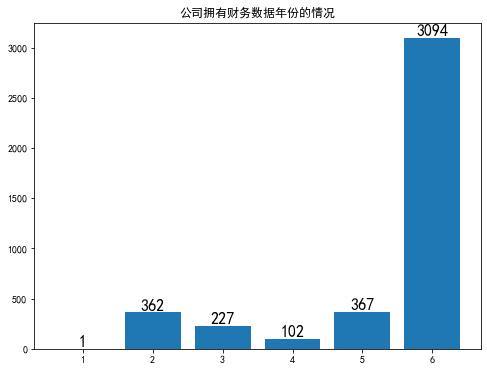

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6)) 

plt.bar(file_2['TICKER_SYMBOL'].value_counts().value_counts().index,file_2['TICKER_SYMBOL'].value_counts().value_counts())

for x,y in zip(file_2['TICKER_SYMBOL'].value_counts().value_counts().index,file_2['TICKER_SYMBOL'].value_counts().value_counts()):
    plt.text(x,y,'%s' %round(y),ha='center', va= 'bottom',fontsize=16)

plt.title('公司拥有财务数据年份的情况')
plt.show()

大部分股票是有6年

统计造假、不造假标签的数量

In [9]:
da = file_2.copy(deep = True)
da['FLAG'] = da['FLAG'].fillna(-1)
da['FLAG'] = da['FLAG'].apply(lambda x : str(x))
da['FLAG'].value_counts()

0.0     17880
-1.0     4153
1.0       180
Name: FLAG, dtype: int64

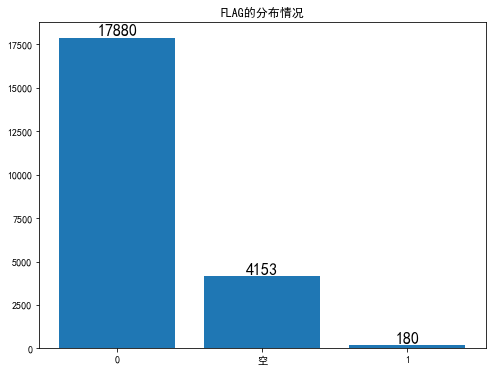

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6)) 

plt.bar(['0','空','1'],da['FLAG'].value_counts())

for x,y in zip(['0','空','1'],da['FLAG'].value_counts()):
    plt.text(x,y,'%s'%round(y),ha='center', va= 'bottom',fontsize=16)

plt.title('FLAG的分布情况')
plt.show()

样本严重不均衡，100:1 一定要采样

## 查看个字段缺失值情况

In [11]:
a = file_3.iloc[:,:2]
a = pd.DataFrame(a)
a = a.set_index(a['字段名'])
del a['字段名']
b = pd.DataFrame(file_2.iloc[:,:].isnull().sum(),columns=['缺失值'])  
pd.merge(b,a,how='outer',left_index=True,right_index=True)

缺失值                         含义
TICKER_SYMBOL              0                       股票代码
ACT_PUBTIME                0                     实际披露时间
PUBLISH_DATE               0                       发布时间
END_DATE_REP               0                     报告截止日期
END_DATE                   0                       截止日期
REPORT_TYPE                0                       报告类型
FISCAL_PERIOD              0                       会计区间
MERGED_FLAG                0            合并标志：1-合并，2-母公司
ACCOUTING_STANDARDS        0                       会计准则
CURRENCY_CD                0                       货币代码
CASH_C_EQUIV               1                       货币资金
SETT_PROV              21753                      结算备付金
LOAN_TO_OTH_BANK_FI    21812                       拆出资金
TRADING_FA             18118                    交易性金融资产
NOTES_RECEIV            4610                       应收票据
AR                       742                       应收账款
PREPAYMENT               591                       预付款项
PREMIUM_RECEIV         21984                       应收保费
REINSUR_RECEIV         21991                     应收分保账款
REINSUR_RESER_RECEIV   22022                  应收分保合同准备金
INT_RECEIV             15055                       应收利息
DIV_RECEIV             20018                       应收股利
OTH_RECEIV              1356                      其他应收款
PUR_RESALE_FA          21478                   买入返售金融资产
INVENTORIES              843                         存货
NCA_WITHIN_1Y          19044                一年内到期的非流动资产
OTH_CA                  2816                     其他流动资产
T_CA                     460                     流动资产合计
DISBUR_LA              21423                  发放委托贷款及垫款
AVAIL_FOR_SALE_FA       9251                   可供出售金融资产
HTM_INVEST             21320                    持有至到期投资
LT_RECEIV              18449                      长期应收款
LT_EQUITY_INVEST        9186                     长期股权投资
INVEST_REAL_ESTATE     12910                     投资性房地产
FIXED_ASSETS               5                       固定资产
CIP                     3634                       在建工程
CONST_MATERIALS        18877                       工程物资
FIXED_ASSETS_DISP      20738                     固定资产清理
PRODUC_BIOL_ASSETS     21294                    生产性生物资产
OIL_AND_GAS_ASSETS     21933                       油气资产
INTAN_ASSETS             274                       无形资产
R_D                    18286                       研发支出
GOODWILL               12139                         商誉
LT_AMOR_EXP             4808                     长期待摊费用
DEFER_TAX_ASSETS         713                    递延所得税资产
OTH_NCA                 7524                    其他非流动资产
T_NCA                    461                    非流动资产合计
T_ASSETS                   0                       资产总计
ST_BORR                 5494                       短期借款
CB_BORR                21849                    向中央银行借款
DEPOS                  21693                       吸收存款
LOAN_FR_OTH_BANK_FI    21591                       拆入资金
TRADING_FL             20030                    交易性金融负债
NOTES_PAYABLE           8264                       应付票据
AP                       691                       应付账款
ADVANCE_RECEIPTS         857                       预收款项
SOLD_FOR_REPUR_FA      21501                  卖出回购金融资产款
COMMIS_PAYABLE         21980                   应付手续费及佣金
PAYROLL_PAYABLE          107                     应付职工薪酬
TAXES_PAYABLE              3                       应交税费
INT_PAYABLE             8333                       应付利息
DIV_PAYABLE            15156                       应付股利
OTH_PAYABLE             1269                      其他应付款
REINSUR_PAYABLE        21994                     应付分保账款
INSUR_RESER            22028                    保险合同准备金
FUNDS_SEC_TRAD_AGEN    21781                    代理买卖证券款
FUNDS_SEC_UNDW_AGEN    21998                    代理承销证券款
NCL_WITHIN_1Y          11217                一年内到期的非流动负债
ACCRUED_EXP            22209                       预提费用
OTH_CL                 15820                     其他流动负债
T_CL                     460                     

后面这些“率”都是缺这么多，若是删除50%以上缺失值那这些字段全被删了

# 数据合并——行业处理

在本题中，行业信息都在附件1中，财务数据都在附件2中，其中附件2的“TICKER_SYMBOL”与附件1的“股票代码”对应，因此我们可以将附件1与附件2合并，在附件2中新增一列“所属行业”。

In [12]:
file_1.columns = ['TICKER_SYMBOL','所属行业']
data = pd.merge(file_1,file_2,how='right',on='TICKER_SYMBOL')
# data.to_csv('加上所属行业.csv')
data.head()

TICKER_SYMBOL             所属行业  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  \
0         4019.0              制造业            3             3             2   
1         8166.0              制造业            3             3             2   
2         9063.0           批发和零售业            3             3             2   
3        10083.0  信息传输、软件和信息技术服务业            4             4             4   
4        11737.0              制造业            3             3             2   

   END_DATE REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS  \
0         1           A             12            1           CHAS_2007   
1         1           A             12            1           CHAS_2007   
2         1           A             12            1           CHAS_2007   
3         1           A             12            1           CHAS_2007   
4         1           A             12            1           CHAS_2007   

  CURRENCY_CD  CASH_C_EQUIV  SETT_PROV  LOAN_TO_OTH_BANK_FI  TRADING_FA  \
0         CNY  6.719939e+08        NaN                  NaN         NaN   
1         CNY  1.010981e+09        NaN                  NaN         NaN   
2         CNY  5.308711e+09        NaN                  NaN         NaN   
3         CNY  3.929683e+07        NaN                  NaN         NaN   
4         CNY  1.502023e+09        NaN                  NaN         NaN   

   NOTES_RECEIV            AR    PREPAYMENT  PREMIUM_RECEIV  REINSUR_RECEIV  \
0  1.643520e+08  3.451945e+08  1.039522e+07             NaN             NaN   
1  2.155752e+09  2.887470e+08  1.075202e+08             NaN             NaN   
2  1.201409e+08  8.334355e+07  1.068590e+09             NaN             NaN   
3           NaN  3.117961e+08  1.379073e+06             NaN             NaN   
4  2.688988e+07  9.517806e+08  4.157376e+07             NaN             NaN   

   REINSUR_RESER_RECEIV   INT_RECEIV  DIV_RECEIV    OTH_RECEIV  PUR_RESALE_FA  \
0                   NaN   2311657.01         NaN  3.584941e+06            NaN   
1                   NaN          NaN         NaN  8.562676e+07            NaN   
2                   NaN  10374869.29         NaN  1.998471e+08            NaN   
3                   NaN          NaN         NaN  2.154801e+06            NaN   
4                   NaN   6464811.93         NaN  3.751924e+07            NaN   

    INVENTORIES  NCA_WITHIN_1Y        OTH_CA          T_CA  DISBUR_LA  \
0  9.372176e+07            NaN           NaN  1.291554e+09        NaN   
1  1.049809e+09            NaN  1.080342e+07  4.709240e+09        NaN   
2  1.890696e+09    190000000.0  7.465038e+06  8.879169e+09        NaN   
3  4.826158e+07            NaN           NaN  4.028884e+08        NaN   
4  6.611381e+08            NaN  3.919438e+08  3.619333e+09        NaN   

   AVAIL_FOR_SALE_FA  HTM_INVEST  LT_RECEIV  LT_EQUITY_INVEST  \
0                NaN         NaN        NaN      2.026086e+07   
1                NaN         NaN        NaN      2.530000e+04   
2        12622291.31         NaN        NaN               NaN   
3                NaN         NaN        NaN               NaN   
4         1500000.00         NaN        NaN      1.503091e+08   

   INVEST_REAL_ESTATE  FIXED_ASSETS           CIP  CONST_MATERIALS  \
0                 NaN  5.634969e+08  6.391817e+07              NaN   
1                 NaN  6.487973e+08  4.784063e+07              NaN   
2         70897893.22  2.445579e+09  3.964999e+08              NaN   
3          3517245.42  4.895893e+07  4.846247e+06              NaN   
4          7020615.68  5.680283e+08  4.984903e+08              NaN   

   FIXED_ASSETS_DISP  PRODUC_BIOL_ASSETS  OIL_AND_GAS_ASSETS  INTAN_ASSETS  \
0                NaN                 NaN                 NaN  3.585301e+07   
1                NaN                 NaN                 NaN  1.981519e+08   
2                NaN                 NaN                 NaN  1.488267e+08   
3                NaN                 NaN                 NaN  2.225766e+07   
4           38116.09         

In [13]:
data['所属行业'].value_counts()

制造业                 12287
信息传输、软件和信息技术服务业      1576
批发和零售业                906
电力、热力、燃气及水生产和供应业      597
房地产业                  586
金融业                   573
交通运输、仓储和邮政业           541
建筑业                   460
采矿业                   412
文化、体育和娱乐业             315
水利、环境和公共设施管理业         307
租赁和商务服务业              293
科学研究和技术服务业            264
农、林、牧、渔业              228
综合                     90
卫生和社会工作                65
住宿和餐饮业                 56
教育                     48
居民服务、修理和其他服务业           5
Name: 所属行业, dtype: int64

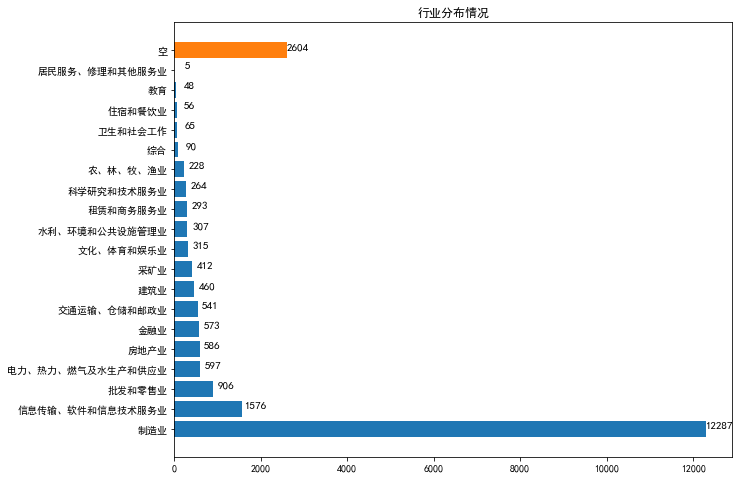

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,8)) 

plt.barh(data['所属行业'].value_counts().index,data['所属行业'].value_counts())
plt.barh(['空'],data['所属行业'].isnull().sum())

for x,y in zip(data['所属行业'].value_counts().index,data['所属行业'].value_counts()):
    plt.text(y+300,x,'%s'%round(y),ha='center', va= 'bottom',fontsize=11)
plt.text(data['所属行业'].isnull().sum(),['空'],data['所属行业'].isnull().sum(),fontsize=11)

plt.title('行业分布情况')
plt.show()

In [15]:
data = data[~data['所属行业'].isnull()]  # 只提取有行业信息的数据

# 提取制造业

这一步的原因：题目要求找出造假指标和预测第六年，只要做出了制造业的，那么其他的也能做出

由于每个行业的侧重点不同，比如金融行业更注重XXX，而不注重存货，所有有些指标对于不同行业来说具有不同的重要性，因此在数据预处理阶段我们将每个行业都分别提取出来进行预处理。

In [16]:
data = data[data['所属行业']=='制造业']
print('制造业数据量:',data.shape[0])  # 查看制造业的数据情况

制造业数据量: 12287


In [17]:
data['FLAG'].value_counts()

0.0    9863
1.0      80
Name: FLAG, dtype: int64

样本严重不平衡

In [126]:
data_label = data[~data['FLAG'].isnull()] # 提取存有标签的数据
data_non = data[data['FLAG'].isnull()]  # 提取没有标签的数据
print('有标签的数据量：',data_label.shape[0])
print('没有标签的数据量：',data_non.shape[0])

有标签的数据量： 9943
没有标签的数据量： 2344


data_label.to_csv('制造业含Flag的未清洗数据.csv')

# 数据预处理（数据清洗）

## 异常值处理

本题中的22213条数据中的数据分布较为离散，使用箱式图异常值处理不合理，下面以“CASH_C_EQUIV”为例。  
目前还不知道怎么处理异常值！

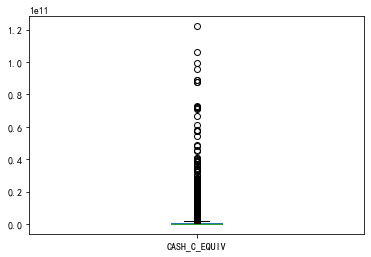

In [127]:
data_label['CASH_C_EQUIV'].plot.box()
plt.show()

## 缺失值处理

### 删除缺失值较大的指标

这一步的原因：如果一个指标缺失值太大，那么就不会有什么影响，没必要再放入模型计算  
<font color=red>但是我们发现，对于XXX率来说，缺失值普遍偏多，而这些指标能够横向对比，如果采用了营业收入、营业成本等指标，它们受到公司规模的影响，有一些公司的值偏大，有些偏小。所以针对XXX率，我们不能直接将其删除，通过阅读大量文献，我们选取几个已经被证实具有较大影响的指标。</font>    
如果某个特征因子缺失的样本占总数极大，我们就直接舍弃了；因为如果作为特征加入的话，可能反倒带入噪音，影响最后的结果。

In [128]:
print('删除列50%缺失值前的数据形状:',data_label.shape)
data_drop =pd.DataFrame()
for i in data_label.columns:
    if ((data_label[i].isnull().sum() / data_label.shape[0]) >= 0.5):
        data_drop[i] = data_label[i]
        del data_label[i]
        
print('删除列50%缺失值后的数据形状:',data_label.shape)
data_label.head()

删除列50%缺失值前的数据形状: (9943, 364)
删除列50%缺失值后的数据形状: (9943, 102)


TICKER_SYMBOL 所属行业  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  END_DATE  \
0         4019.0  制造业            3             3             2         1   
1         8166.0  制造业            3             3             2         1   
4        11737.0  制造业            3             3             2         1   
6        16479.0  制造业            3             3             2         1   
7        16842.0  制造业            4             4             3         1   

  REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS CURRENCY_CD  \
0           A             12            1           CHAS_2007         CNY   
1           A             12            1           CHAS_2007         CNY   
4           A             12            1           CHAS_2007         CNY   
6           A             12            1           CHAS_2007         CNY   
7           A             12            1           CHAS_2007         CNY   

   CASH_C_EQUIV  NOTES_RECEIV            AR    PREPAYMENT   OTH_RECEIV  \
0  6.719939e+08  1.643520e+08  3.451945e+08  1.039522e+07   3584940.60   
1  1.010981e+09  2.155752e+09  2.887470e+08  1.075202e+08  85626756.05   
4  1.502023e+09  2.688988e+07  9.517806e+08  4.157376e+07  37519236.14   
6  9.966031e+08  3.686740e+05  2.824134e+08  2.741431e+07  67249473.03   
7  5.763404e+07  8.990000e+06  5.941825e+07  3.603420e+07    775584.93   

    INVENTORIES        OTH_CA          T_CA  AVAIL_FOR_SALE_FA  \
0  9.372176e+07           NaN  1.291554e+09                NaN   
1  1.049809e+09  1.080342e+07  4.709240e+09                NaN   
4  6.611381e+08  3.919438e+08  3.619333e+09          1500000.0   
6  3.400061e+08  8.145214e+08  2.554056e+09                NaN   
7  6.985958e+07  4.721015e+05  2.331838e+08                NaN   

   LT_EQUITY_INVEST  FIXED_ASSETS           CIP  INTAN_ASSETS  LT_AMOR_EXP  \
0      2.026086e+07  5.634969e+08  6.391817e+07  3.585301e+07    545688.63   
1      2.530000e+04  6.487973e+08  4.784063e+07  1.981519e+08   6210000.00   
4      1.503091e+08  5.680283e+08  4.984903e+08  1.617680e+08  13757241.10   
6               NaN  4.373165e+08  5.899415e+05  1.335565e+08  19409491.63   
7               NaN  6.166910e+07  5.852628e+06  7.648295e+06          NaN   

   DEFER_TAX_ASSETS     OTH_NCA         T_NCA      T_ASSETS      ST_BORR  \
0       11001814.32         NaN  6.950765e+08  1.986631e+09          NaN   
1       58257366.72         NaN  9.592825e+08  5.668523e+09          NaN   
4       12424064.96  52390000.0  2.109838e+09  5.729171e+09     100000.0   
6        5365350.75  17044765.0  6.542753e+08  3.208332e+09  247550400.0   
7        1021734.42         NaN  7.619176e+07  3.093755e+08   11850000.0   

   NOTES_PAYABLE            AP  ADVANCE_RECEIPTS  PAYROLL_PAYABLE  \
0   4.313726e+07  7.541231e+07      9.225916e+06      15297539.80   
1   1.641824e+09  1.202195e+09      4.125212e+08      94566289.85   
4   3.393366e+07  3.282528e+08      2.480919e+08      13656422.70   
6   1.354398e+08  3.740662e+08      4.214578e+07      59014385.16   
7            NaN  7.719099e+07      4.891834e+05       1551606.60   

   TAXES_PAYABLE  INT_PAYABLE   OTH_PAYABLE          T_CL  DEFER_REVENUE  \
0   1.187480e+07          NaN  5.578971e+05  1.565688e+08   3.744544e+07   
1   1.000303e+08          NaN  1.710886e+08  3.622225e+09   1.235882e+08   
4   6.007812e+07          NaN  9.904703e+07  7.833997e+08   1.937322e+08   
6   1.310917e+07    444138.21  4.680572e+07  9.196064e+08            NaN   
7   2.639110e+06     37133.33  2.017179e+05  9.399980e+07   9.051247e+06   

          T_NCL        T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  SURPLUS_RESER  \
0  4.244544e+07  1.990142e+08      295000000.0   1.143312e+09   3.805674e+07   
1  1.235882e+08  3.745814e+09      532800000.0   1.674685e+07   2.120568e+08   
4  2.083717e+08  9.917714e+08      665013020.0   2.923581e+09   1.527853e+08   
6  2.127105e+08  1.132317e+09      240000000.0   1.339304e+09   1.976141e+07   
7  9.051247e+06  1.030510e+08       5000000

In [129]:
data_drop.columns

Index(['SETT_PROV', 'LOAN_TO_OTH_BANK_FI', 'TRADING_FA', 'PREMIUM_RECEIV',
       'REINSUR_RECEIV', 'REINSUR_RESER_RECEIV', 'INT_RECEIV', 'DIV_RECEIV',
       'PUR_RESALE_FA', 'NCA_WITHIN_1Y',
       ...
       'AP_TURNOVER', 'CA_TURNOVER', 'OPER_CYCLE', 'INVEN_TURNOVER',
       'FA_TURNOVER', 'TFA_TURNOVER', 'DAYS_AP', 'DAYS_INVEN', 'TA_TURNOVER',
       'AR_TURNOVER'],
      dtype='object', length=262)

### 数据填充

这一步的原因：还是存有许多指标为空，如果不进行处理，不便于模型训练  
我们用均值填充，填充后都是一样的，不会影响它

#### 均值填充

In [130]:
for column in list(data_label.columns[(data_label.isnull().sum()/data_label.shape[0]) > 0.2]):
    mean_val = data_label[column].mean()
    data_label[column].fillna(mean_val, inplace=True)
data_label.head()

TICKER_SYMBOL 所属行业  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  END_DATE  \
0         4019.0  制造业            3             3             2         1   
1         8166.0  制造业            3             3             2         1   
4        11737.0  制造业            3             3             2         1   
6        16479.0  制造业            3             3             2         1   
7        16842.0  制造业            4             4             3         1   

  REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS CURRENCY_CD  \
0           A             12            1           CHAS_2007         CNY   
1           A             12            1           CHAS_2007         CNY   
4           A             12            1           CHAS_2007         CNY   
6           A             12            1           CHAS_2007         CNY   
7           A             12            1           CHAS_2007         CNY   

   CASH_C_EQUIV  NOTES_RECEIV            AR    PREPAYMENT   OTH_RECEIV  \
0  6.719939e+08  1.643520e+08  3.451945e+08  1.039522e+07   3584940.60   
1  1.010981e+09  2.155752e+09  2.887470e+08  1.075202e+08  85626756.05   
4  1.502023e+09  2.688988e+07  9.517806e+08  4.157376e+07  37519236.14   
6  9.966031e+08  3.686740e+05  2.824134e+08  2.741431e+07  67249473.03   
7  5.763404e+07  8.990000e+06  5.941825e+07  3.603420e+07    775584.93   

    INVENTORIES        OTH_CA          T_CA  AVAIL_FOR_SALE_FA  \
0  9.372176e+07           NaN  1.291554e+09       2.289376e+08   
1  1.049809e+09  1.080342e+07  4.709240e+09       2.289376e+08   
4  6.611381e+08  3.919438e+08  3.619333e+09       1.500000e+06   
6  3.400061e+08  8.145214e+08  2.554056e+09       2.289376e+08   
7  6.985958e+07  4.721015e+05  2.331838e+08       2.289376e+08   

   LT_EQUITY_INVEST  FIXED_ASSETS           CIP  INTAN_ASSETS   LT_AMOR_EXP  \
0      2.026086e+07  5.634969e+08  6.391817e+07  3.585301e+07  5.456886e+05   
1      2.530000e+04  6.487973e+08  4.784063e+07  1.981519e+08  6.210000e+06   
4      1.503091e+08  5.680283e+08  4.984903e+08  1.617680e+08  1.375724e+07   
6      4.478847e+08  4.373165e+08  5.899415e+05  1.335565e+08  1.940949e+07   
7      4.478847e+08  6.166910e+07  5.852628e+06  7.648295e+06  2.591093e+07   

   DEFER_TAX_ASSETS       OTH_NCA         T_NCA      T_ASSETS       ST_BORR  \
0       11001814.32  1.075487e+08  6.950765e+08  1.986631e+09  1.062625e+09   
1       58257366.72  1.075487e+08  9.592825e+08  5.668523e+09  1.062625e+09   
4       12424064.96  5.239000e+07  2.109838e+09  5.729171e+09  1.000000e+05   
6        5365350.75  1.704476e+07  6.542753e+08  3.208332e+09  2.475504e+08   
7        1021734.42  1.075487e+08  7.619176e+07  3.093755e+08  1.185000e+07   

   NOTES_PAYABLE            AP  ADVANCE_RECEIPTS  PAYROLL_PAYABLE  \
0   4.313726e+07  7.541231e+07      9.225916e+06      15297539.80   
1   1.641824e+09  1.202195e+09      4.125212e+08      94566289.85   
4   3.393366e+07  3.282528e+08      2.480919e+08      13656422.70   
6   1.354398e+08  3.740662e+08      4.214578e+07      59014385.16   
7   4.914704e+08  7.719099e+07      4.891834e+05       1551606.60   

   TAXES_PAYABLE   INT_PAYABLE   OTH_PAYABLE          T_CL  DEFER_REVENUE  \
0   1.187480e+07  1.637351e+07  5.578971e+05  1.565688e+08   3.744544e+07   
1   1.000303e+08  1.637351e+07  1.710886e+08  3.622225e+09   1.235882e+08   
4   6.007812e+07  1.637351e+07  9.904703e+07  7.833997e+08   1.937322e+08   
6   1.310917e+07  4.441382e+05  4.680572e+07  9.196064e+08            NaN   
7   2.639110e+06  3.713333e+04  2.017179e+05  9.399980e+07   9.051247e+06   

          T_NCL        T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  SURPLUS_RESER  \
0  4.244544e+07  1.990142e+08      295000000.0   1.143312e+09   3.805674e+07   
1  1.235882e+08  3.745814e+09      532800000.0   1.674685e+07   2.120568e+08   
4  2.083717e+08  9.917714e+08      665013020.0   2.923581e+09   1.527853e+08   
6  2.127105e+08  1.132317e+09      240000000.0   1.339304e+09   1.976141e+07   
7  9.051247e+

#### 随机森林填充

In [131]:
len(data_label.columns[(data_label.isnull().sum()/data_label.shape[0]) <= 0.2])

102

In [132]:
print(len(data_label.columns[((data_label.isnull().sum()/data_label.shape[0]) <= 0.2)&((data_label.isnull().sum()/data_label.shape[0])>0)]))
cols = data_label.columns[((data_label.isnull().sum()/data_label.shape[0]) <= 0.2)&((data_label.isnull().sum()/data_label.shape[0])>0)]
cols

49


Index(['NOTES_RECEIV', 'AR', 'PREPAYMENT', 'OTH_RECEIV', 'INVENTORIES',
       'OTH_CA', 'FIXED_ASSETS', 'CIP', 'INTAN_ASSETS', 'DEFER_TAX_ASSETS',
       'AP', 'ADVANCE_RECEIPTS', 'PAYROLL_PAYABLE', 'TAXES_PAYABLE',
       'OTH_PAYABLE', 'DEFER_REVENUE', 'T_NCL', 'PAID_IN_CAPITAL',
       'CAPITAL_RESER', 'SURPLUS_RESER', 'RETAINED_EARNINGS',
       'N_CF_FR_INVEST_A', 'C_FR_BORR', 'C_INF_FR_INVEST_A', 'C_PAID_G_S',
       'C_PAID_FOR_OTH_OP_A', 'C_FR_SALE_G_S', 'C_PAID_DIV_PROF_INT',
       'C_OUTF_FR_INVEST_A', 'C_PAID_FOR_DEBTS', 'DISP_FIX_ASSETS_OTH',
       'N_CF_FR_FINAN_A', 'N_CE_BEG_BAL', 'PUR_FIX_ASSETS_OTH',
       'C_INF_FR_FINAN_A', 'C_OUTF_FR_FINAN_A', 'DILUTED_EPS', 'REVENUE',
       'T_REVENUE', 'BASIC_EPS', 'ASSETS_IMPAIR_LOSS', 'COMPR_INC_ATTR_P',
       'INVEST_INCOME', 'SELL_EXP', 'COGS', 'BIZ_TAX_SURCHG', 'NOPERATE_EXP',
       'INCOME_TAX', 'NOPERATE_INCOME'],
      dtype='object')

In [38]:
a = ['TICKER_SYMBOL']
a.extend(list(cols))
a.append('FLAG')
data_label[data_label['FLAG']==1][a]

TICKER_SYMBOL  NOTES_RECEIV            AR    PREPAYMENT    OTH_RECEIV  \
285         423981.0  5.935865e+05  1.112265e+07  1.989121e+06  6.988053e+06   
1169       1820265.0  1.470361e+07  5.459419e+08  1.771990e+08  2.997308e+07   
2336       3695289.0  7.082180e+07  2.792544e+07  2.878425e+06  8.614555e+06   
2357       3743084.0           NaN  7.698891e+05  1.508952e+08  9.656925e+07   
2710       4391931.0  1.039220e+09  2.170851e+09  2.520535e+08  2.043267e+08   
3157         90125.0  3.397157e+07  2.564330e+07  2.012434e+07  2.964337e+07   
3661        789627.0  4.553988e+07  3.149678e+08  5.455330e+08  6.237536e+08   
3692        824674.0           NaN           NaN  1.630656e+05  1.635984e+05   
4141       1441266.0           NaN  8.008725e+07  8.047946e+06  1.736840e+08   
5133       2847618.0  0.000000e+00  1.108177e+08  1.638132e+07  1.887666e+08   
5956       4106218.0           NaN  1.974481e+06  8.734188e+06  3.009626e+07   
6129       4391931.0  9.795897e+08  2.623137e+09  2.607751e+08  1.830800e+08   
6261       4578172.0  2.837895e+06  2.635464e+07  7.153145e+06  1.460334e+07   
6303       4638024.0  1.276200e+07  1.227398e+08  1.083305e+07  4.644749e+07   
6709        200616.0  5.033088e+08  1.180990e+09  3.816039e+07  5.084551e+07   
7015        586638.0  1.178034e+06  1.743671e+08  2.179441e+05  5.272083e+06   
7026        607310.0  2.489778e+08  4.705656e+09  3.451574e+08  2.039135e+08   
7081        694894.0  1.092485e+09  5.495409e+09  2.967969e+08  5.766463e+07   
7177        824674.0  5.000000e+07           NaN           NaN  7.241293e+08   
7272        956053.0           NaN  5.910929e+06  1.588210e+07  5.719216e+07   
7437       1149643.0  3.141000e+06  4.884154e+08  1.895773e+07  3.916698e+07   
7538       1299232.0  1.050000e+06  7.248890e+07  1.196424e+07  4.605918e+06   
7548       1314777.0  1.589120e+08  3.072780e+08  8.611506e+06  2.588580e+06   
7716       1527075.0  3.028212e+06  1.977032e+08  9.353543e+07  2.096292e+06   
7833       1677269.0  1.299012e+08  4.099575e+08  1.416646e+08  6.519405e+06   
8011       1950120.0  8.850000e+06  2.130912e+07  3.396517e+06  2.302395e+07   
8116       2112284.0  2.347450e+06  1.235343e+08  1.033741e+06  1.934872e+06   
8523       2673748.0           NaN  3.533649e+06           NaN  1.934087e+06   
8675       2867875.0  1.282687e+08  6.880762e+08  3.893119e+07  7.942621e+06   
8755       2990894.0           NaN  5.337817e+06  6.120006e+07  2.137687e+07   
8788       3033695.0  3.416776e+08  1.308611e+09  3.641608e+08  6.647717e+07   
8923       3211638.0  8.027911e+08  1.019198e+09  6.528865e+08  1.644835e+06   
8952       3261456.0  2.236648e+07  5.527090e+08  2.560384e+07  1.034747e+07   
9067       3435688.0  1.132187e+09  5.800417e+09  7.289957e+08  1.389811e+08   
9212       3646698.0  4.568491e+06  1.989589e+07  2.500173e+06  1.271756e+06   
9540       4174154.0  2.717437e+06  2.676581e+08  3.626247e+06  4.880674e+06   
9677       4387065.0  7.598835e+07  1.621883e+09  1.897716e+08  1.973914e+08   
9681       4391931.0  1.114332e+09  2.671498e+09  2.124774e+08  1.054104e+08   
9751       4479025.0           NaN  9.989646e+07  5.458682e+07  3.711152e+07   
9835       4601830.0  1.057745e+07  2.704553e+08  1.007407e+07  4.987907e+06   
9854       4635708.0  4.641786e+06  6.042831e+07  1.090074e+07  1.478467e+07   
10004      4838928.0  4.840005e+08  5.890090e+08  1.074186e+08  8.998549e+06   
10379       325632.0  2.719170e+08  4.933698e+08  2.967375e+08  6.754033e+07   
10455       399638.0  1.400000e+06  1.943970e+08  8.190020e+06  3.107989e+07   
10473       422647.0  8.110158e+07  2.014512e+08  1.398869e+07  1.050700e+07   
10678       694894.0  3.071589e+09  6.453360e+09  4.859962e+08  1.305375e+09   
11167      1299232.0  1.939760e+06  7.272159e+07  8.961611e+06  6.123423e+06   
11564      1802653.0           NaN           NaN  1.187000e+03  8.385911e+07   
11927      2294861.0  9.134101e+07  6.023590e+07  8.912715e+06  9.032654e+06   
12347  

我们发现还是有挺多造假数据缺少值，所以用随机森林填充

In [170]:
data_label.isnull().sum()

TICKER_SYMBOL             0
所属行业                      0
ACT_PUBTIME               0
PUBLISH_DATE              0
END_DATE_REP              0
END_DATE                  0
REPORT_TYPE               0
FISCAL_PERIOD             0
MERGED_FLAG               0
ACCOUTING_STANDARDS       0
CURRENCY_CD               0
CASH_C_EQUIV              0
NOTES_RECEIV           1097
AR                      155
PREPAYMENT               20
OTH_RECEIV              394
INVENTORIES              22
OTH_CA                 1247
T_CA                      0
AVAIL_FOR_SALE_FA         0
LT_EQUITY_INVEST          0
FIXED_ASSETS              1
CIP                     873
INTAN_ASSETS             64
LT_AMOR_EXP               0
DEFER_TAX_ASSETS        275
OTH_NCA                   0
T_NCA                     0
T_ASSETS                  0
ST_BORR                   0
NOTES_PAYABLE             0
AP                      139
ADVANCE_RECEIPTS        119
PAYROLL_PAYABLE          66
TAXES_PAYABLE             1
INT_PAYABLE         

In [177]:
while True:
    try:
        # 找出缺失值最小的列名
        col_name = data_label.isnull().sum()[data_label.isnull().sum()>0].index[data_label.isnull().sum()[data_label.isnull().sum()>0].argmin()]
        # 创建一个新的数据集
        RF_fill = data_label.copy(deep = True)
        # 筛选出有用的指标
        RF_fill = RF_fill.iloc[:,11:]
        # 切分训练集和预测集
        RF_train = RF_fill[~RF_fill[col_name].isnull()]
        RF_train_Y = RF_train.pop(col_name)
        RF_train_X = RF_train

        RF_pre = RF_fill[RF_fill[col_name].isnull()]
        RF_pre_Y = RF_pre.pop(col_name)
        RF_pre_X = RF_pre
        # 填充X
        RF_train_X =RF_train_X.fillna(0)
        RF_pre_X = RF_pre_X.fillna(0)
        # 训练
        from sklearn.ensemble import RandomForestRegressor

        RF_fill = data_label.copy(deep = True)

        clf = RandomForestRegressor(random_state=1)
        clf.fit(RF_train_X, RF_train_Y)
        pre = clf.predict(RF_pre_X)
        # 填充
        data_label.loc[RF_pre_Y.index,col_name] = pre
        print(col_name)
    except:
        break

C_FR_SALE_G_S
PUR_FIX_ASSETS_OTH
BIZ_TAX_SURCHG
PREPAYMENT
SELL_EXP
INVENTORIES
NOPERATE_INCOME
INTAN_ASSETS
PAYROLL_PAYABLE
N_CF_FR_FINAN_A
SURPLUS_RESER
CAPITAL_RESER
INCOME_TAX
NOPERATE_EXP
ADVANCE_RECEIPTS
C_OUTF_FR_FINAN_A
AP
AR
C_PAID_DIV_PROF_INT
DEFER_TAX_ASSETS
BASIC_EPS
C_INF_FR_INVEST_A
OTH_PAYABLE
ASSETS_IMPAIR_LOSS
OTH_RECEIV
T_NCL
DILUTED_EPS
C_INF_FR_FINAN_A
CIP
NOTES_RECEIV
DISP_FIX_ASSETS_OTH
OTH_CA
C_PAID_FOR_DEBTS
DEFER_REVENUE
C_FR_BORR
INVEST_INCOME


ValueError: attempt to get argmin of an empty sequence

In [189]:
data_label.isnull().sum()

TICKER_SYMBOL          0
所属行业                   0
ACT_PUBTIME            0
PUBLISH_DATE           0
END_DATE_REP           0
END_DATE               0
REPORT_TYPE            0
FISCAL_PERIOD          0
MERGED_FLAG            0
ACCOUTING_STANDARDS    0
CURRENCY_CD            0
CASH_C_EQUIV           0
NOTES_RECEIV           0
AR                     0
PREPAYMENT             0
OTH_RECEIV             0
INVENTORIES            0
OTH_CA                 0
T_CA                   0
AVAIL_FOR_SALE_FA      0
LT_EQUITY_INVEST       0
FIXED_ASSETS           0
CIP                    0
INTAN_ASSETS           0
LT_AMOR_EXP            0
DEFER_TAX_ASSETS       0
OTH_NCA                0
T_NCA                  0
T_ASSETS               0
ST_BORR                0
NOTES_PAYABLE          0
AP                     0
ADVANCE_RECEIPTS       0
PAYROLL_PAYABLE        0
TAXES_PAYABLE          0
INT_PAYABLE            0
OTH_PAYABLE            0
T_CL                   0
DEFER_REVENUE          0
T_NCL                  0


In [182]:
data_label.to_csv('制造业填充完的数据.csv')

In [215]:
data_label.head()

CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  INVENTORIES  \
0      0.005507      0.003256  0.004397    0.000324    0.000110     0.000950   
1      0.008286      0.042705  0.003678    0.003355    0.002627     0.010642   
4      0.012310      0.000533  0.012123    0.001297    0.001151     0.006702   
6      0.008168      0.000007  0.003597    0.000855    0.002063     0.003447   
7      0.000471      0.000178  0.000757    0.001124    0.000024     0.000708   

     OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  FIXED_ASSETS  \
0  0.003501  0.003294           0.003495          0.000875      0.003436   
1  0.000208  0.012058           0.003495          0.000576      0.003956   
4  0.007535  0.009263           0.000023          0.002801      0.003464   
6  0.015660  0.006531           0.003495          0.007207      0.002667   
7  0.000009  0.000580           0.003495          0.007207      0.000376   

        CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS   OTH_NCA     T_NCA  \
0  0.001259      0.001425     0.000149          0.000441  0.003670  0.002081   
1  0.000942      0.007876     0.001695          0.002336  0.003670  0.002872   
4  0.009820      0.006430     0.003754          0.000498  0.001788  0.006317   
6  0.000012      0.005309     0.005296          0.000215  0.000582  0.001959   
7  0.000115      0.000304     0.007070          0.000041  0.003670  0.000228   

   T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  ADVANCE_RECEIPTS  \
0  0.002702  0.017627       0.001012  0.000623          0.000209   
1  0.007788  0.017627       0.038526  0.009935          0.009342   
4  0.007871  0.000002       0.000796  0.002712          0.005618   
6  0.004389  0.004107       0.003178  0.003091          0.000954   
7  0.000385  0.000197       0.011533  0.000637          0.000011   

   PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE      T_CL  \
0         0.001506       0.140674     0.019081     0.000009  0.000388   
1         0.009313       0.145100     0.019081     0.002898  0.009252   
4         0.001345       0.143094     0.019081     0.001678  0.001991   
6         0.005812       0.140736     0.000518     0.000793  0.002340   
7         0.000153       0.140211     0.000043     0.000003  0.000228   

   DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  \
0       0.025819  0.033672  0.000430         0.006471       0.037866   
1       0.029435  0.034441  0.008295         0.011688       0.017691   
4       0.032379  0.035245  0.002188         0.014588       0.069748   
6       0.026165  0.035286  0.002500         0.005265       0.041376   
7       0.024628  0.033356  0.000218         0.001097       0.017746   

   SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  MINORITY_INT  \
0       0.001008           0.108256         0.026708      0.025315   
1       0.005618           0.115495         0.027297      0.025315   
4       0.004048           0.112624         0.038821      0.021610   
6       0.000524           0.109624         0.027928      0.018185   
7       0.000367           0.106603         0.019790      0.018114   

   T_SH_EQUITY  T_LIAB_EQUITY  C_PAID_OTH_FINAN_A  N_CF_FR_INVEST_A  \
0     0.022807       0.002702            0.005626          0.702701   
1     0.023295       0.007788            0.005626          0.700811   
4     0.033474       0.007871            0.005626          0.688394   
6     0.023850       0.004389            0.005626          0.699560   
7     0.017088       0.000385            0.000032          0.701667   

   C_FR_BORR  N_CF_OPERATE_A  C_PAID_INVEST  C_INF_FR_INVEST_A  C_PAID_G_S  \
0   0.000037        0.213304       0.001889           0.003162    0.000217   
1   0.000071        0.220885       0.003647           0.000841    0.004112   
4   0.001587        0.217950       0.008813           0.007431    0.000813   
6   0.003774        0.214881       0.003587           0.004766    0.001971   
7   0.000088        0.211521       0.003647           0.000799   

## 数据标准化

这一步的原因：指标的量纲不统一，有的太大，有的太小，必须要进行量纲处理

<font color='red'>补充：采用标准化</font>

### 最大最小归一化

In [204]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_label.iloc[:,11:-1] = scaler.fit_transform(data_label.iloc[:,11:-1])   # 排除前面的无意义字段
data_label = data_label.iloc[:,11:]  # 提取有效训练特征
data_label.head()

CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  INVENTORIES  \
0      0.005507      0.003256  0.004397    0.000324    0.000110     0.000950   
1      0.008286      0.042705  0.003678    0.003355    0.002627     0.010642   
4      0.012310      0.000533  0.012123    0.001297    0.001151     0.006702   
6      0.008168      0.000007  0.003597    0.000855    0.002063     0.003447   
7      0.000471      0.000178  0.000757    0.001124    0.000024     0.000708   

     OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  FIXED_ASSETS  \
0  0.003501  0.003294           0.003495          0.000875      0.003436   
1  0.000208  0.012058           0.003495          0.000576      0.003956   
4  0.007535  0.009263           0.000023          0.002801      0.003464   
6  0.015660  0.006531           0.003495          0.007207      0.002667   
7  0.000009  0.000580           0.003495          0.007207      0.000376   

        CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS   OTH_NCA     T_NCA  \
0  0.001259      0.001425     0.000149          0.000441  0.003670  0.002081   
1  0.000942      0.007876     0.001695          0.002336  0.003670  0.002872   
4  0.009820      0.006430     0.003754          0.000498  0.001788  0.006317   
6  0.000012      0.005309     0.005296          0.000215  0.000582  0.001959   
7  0.000115      0.000304     0.007070          0.000041  0.003670  0.000228   

   T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  ADVANCE_RECEIPTS  \
0  0.002702  0.017627       0.001012  0.000623          0.000209   
1  0.007788  0.017627       0.038526  0.009935          0.009342   
4  0.007871  0.000002       0.000796  0.002712          0.005618   
6  0.004389  0.004107       0.003178  0.003091          0.000954   
7  0.000385  0.000197       0.011533  0.000637          0.000011   

   PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE      T_CL  \
0         0.001506       0.140674     0.019081     0.000009  0.000388   
1         0.009313       0.145100     0.019081     0.002898  0.009252   
4         0.001345       0.143094     0.019081     0.001678  0.001991   
6         0.005812       0.140736     0.000518     0.000793  0.002340   
7         0.000153       0.140211     0.000043     0.000003  0.000228   

   DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  \
0       0.025819  0.033672  0.000430         0.006471       0.037866   
1       0.029435  0.034441  0.008295         0.011688       0.017691   
4       0.032379  0.035245  0.002188         0.014588       0.069748   
6       0.026165  0.035286  0.002500         0.005265       0.041376   
7       0.024628  0.033356  0.000218         0.001097       0.017746   

   SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  MINORITY_INT  \
0       0.001008           0.108256         0.026708      0.025315   
1       0.005618           0.115495         0.027297      0.025315   
4       0.004048           0.112624         0.038821      0.021610   
6       0.000524           0.109624         0.027928      0.018185   
7       0.000367           0.106603         0.019790      0.018114   

   T_SH_EQUITY  T_LIAB_EQUITY  C_PAID_OTH_FINAN_A  N_CF_FR_INVEST_A  \
0     0.022807       0.002702            0.005626          0.702701   
1     0.023295       0.007788            0.005626          0.700811   
4     0.033474       0.007871            0.005626          0.688394   
6     0.023850       0.004389            0.005626          0.699560   
7     0.017088       0.000385            0.000032          0.701667   

   C_FR_BORR  N_CF_OPERATE_A  C_PAID_INVEST  C_INF_FR_INVEST_A  C_PAID_G_S  \
0   0.000037        0.213304       0.001889           0.003162    0.000217   
1   0.000071        0.220885       0.003647           0.000841    0.004112   
4   0.001587        0.217950       0.008813           0.007431    0.000813   
6   0.003774        0.214881       0.003587           0.004766    0.001971   
7   0.000088        0.211521       0.003647           0.000799   

In [205]:
data_label['FLAG'] = data_label['FLAG'].apply(lambda x : int(x))  # 将FLAG变成整数
data_label.head()

CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  INVENTORIES  \
0      0.005507      0.003256  0.004397    0.000324    0.000110     0.000950   
1      0.008286      0.042705  0.003678    0.003355    0.002627     0.010642   
4      0.012310      0.000533  0.012123    0.001297    0.001151     0.006702   
6      0.008168      0.000007  0.003597    0.000855    0.002063     0.003447   
7      0.000471      0.000178  0.000757    0.001124    0.000024     0.000708   

     OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  FIXED_ASSETS  \
0  0.003501  0.003294           0.003495          0.000875      0.003436   
1  0.000208  0.012058           0.003495          0.000576      0.003956   
4  0.007535  0.009263           0.000023          0.002801      0.003464   
6  0.015660  0.006531           0.003495          0.007207      0.002667   
7  0.000009  0.000580           0.003495          0.007207      0.000376   

        CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS   OTH_NCA     T_NCA  \
0  0.001259      0.001425     0.000149          0.000441  0.003670  0.002081   
1  0.000942      0.007876     0.001695          0.002336  0.003670  0.002872   
4  0.009820      0.006430     0.003754          0.000498  0.001788  0.006317   
6  0.000012      0.005309     0.005296          0.000215  0.000582  0.001959   
7  0.000115      0.000304     0.007070          0.000041  0.003670  0.000228   

   T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  ADVANCE_RECEIPTS  \
0  0.002702  0.017627       0.001012  0.000623          0.000209   
1  0.007788  0.017627       0.038526  0.009935          0.009342   
4  0.007871  0.000002       0.000796  0.002712          0.005618   
6  0.004389  0.004107       0.003178  0.003091          0.000954   
7  0.000385  0.000197       0.011533  0.000637          0.000011   

   PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE      T_CL  \
0         0.001506       0.140674     0.019081     0.000009  0.000388   
1         0.009313       0.145100     0.019081     0.002898  0.009252   
4         0.001345       0.143094     0.019081     0.001678  0.001991   
6         0.005812       0.140736     0.000518     0.000793  0.002340   
7         0.000153       0.140211     0.000043     0.000003  0.000228   

   DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  \
0       0.025819  0.033672  0.000430         0.006471       0.037866   
1       0.029435  0.034441  0.008295         0.011688       0.017691   
4       0.032379  0.035245  0.002188         0.014588       0.069748   
6       0.026165  0.035286  0.002500         0.005265       0.041376   
7       0.024628  0.033356  0.000218         0.001097       0.017746   

   SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  MINORITY_INT  \
0       0.001008           0.108256         0.026708      0.025315   
1       0.005618           0.115495         0.027297      0.025315   
4       0.004048           0.112624         0.038821      0.021610   
6       0.000524           0.109624         0.027928      0.018185   
7       0.000367           0.106603         0.019790      0.018114   

   T_SH_EQUITY  T_LIAB_EQUITY  C_PAID_OTH_FINAN_A  N_CF_FR_INVEST_A  \
0     0.022807       0.002702            0.005626          0.702701   
1     0.023295       0.007788            0.005626          0.700811   
4     0.033474       0.007871            0.005626          0.688394   
6     0.023850       0.004389            0.005626          0.699560   
7     0.017088       0.000385            0.000032          0.701667   

   C_FR_BORR  N_CF_OPERATE_A  C_PAID_INVEST  C_INF_FR_INVEST_A  C_PAID_G_S  \
0   0.000037        0.213304       0.001889           0.003162    0.000217   
1   0.000071        0.220885       0.003647           0.000841    0.004112   
4   0.001587        0.217950       0.008813           0.007431    0.000813   
6   0.003774        0.214881       0.003587           0.004766    0.001971   
7   0.000088        0.211521       0.003647           0.000799   

In [214]:
data_label.to_csv('制造业清洗好的数据.csv')

## 等频离散化

# 数据清洗集成

In [267]:
import pandas as pd
pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', None)
# 数据读取
file_1 = pd.read_excel('附件1.xlsx')
file_2 = pd.read_csv('附件2.csv')
file_3 = pd.read_excel('附件3.xlsx')
# 数据合并
file_1.columns = ['TICKER_SYMBOL','所属行业']
data = pd.merge(file_1,file_2,how='right',on='TICKER_SYMBOL')
# 行业提取
columns_list = []
for col in data['所属行业'].value_counts().index:
    columns_list.append(col)
# 分行业进行数据预处理
for i in columns_list:
    data_one = data[data['所属行业']==i]
    print(i,data_one.shape)
    # 将标签列提取出
    flag = data_one.pop('FLAG')
    # 清除缺失值大于50%的列
    for j in data_one.columns:
        if ((data_one[j].isnull().sum() / data_one.shape[0]) >= 0.5):
            del data_one[j]
    # 缺失值20%-50%的用均值填充
    for column in data_one.columns[(data_one.isnull().sum()/data_one.shape[0]) > 0.2]:
        mean_val = data_one[column].mean()
        data_one[column].fillna(mean_val, inplace=True)
    # 使用随机森林填充
    while True:
        try:
            # 找出缺失值最小的列名
            col_name = data_one.isnull().sum()[data_one.isnull().sum()>0].index[data_one.isnull().sum()[data_one.isnull().sum()>0].argmin()]
            # 创建一个新的数据集
            RF_fill = data_one.copy(deep = True)
            # 筛选出有用的指标
            RF_fill = RF_fill.iloc[:,11:]
            # 切分训练集和预测集
            RF_train = RF_fill[~RF_fill[col_name].isnull()]
            RF_train_Y = RF_train.pop(col_name)
            RF_train_X = RF_train

            RF_pre = RF_fill[RF_fill[col_name].isnull()]
            RF_pre_Y = RF_pre.pop(col_name)
            RF_pre_X = RF_pre
            # 填充X
            RF_train_X =RF_train_X.fillna(0)
            RF_pre_X = RF_pre_X.fillna(0)
            # 训练
            from sklearn.ensemble import RandomForestRegressor

            RF_fill = data_label.copy(deep = True)

            clf = RandomForestRegressor(random_state=1)
            clf.fit(RF_train_X, RF_train_Y)
            pre = clf.predict(RF_pre_X)
            # 填充
            data_one.loc[RF_pre_Y.index,col_name] = pre
            print('已填充',col_name)
        except:
            break  # 填充完毕后跳出循环
    # 最大最小归一化
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    data_one.iloc[:,11:-1] = scaler.fit_transform(data_one.iloc[:,11:-1])   # 排除前面的无意义字段
    # 合并标签列
    data_one['FLAG'] = flag
    
    # 保存数据
    data_one.to_csv('{}清洗完成的数据.csv'.format(i))
    print("{}完成".format(i))

制造业 (12287, 364)
已填充 CASH_C_EQUIV
已填充 FIXED_ASSETS
已填充 TAXES_PAYABLE
已填充 C_PAID_FOR_OTH_OP_A
已填充 N_CE_BEG_BAL
已填充 REVENUE
已填充 T_REVENUE
已填充 N_CF_FR_INVEST_A
已填充 C_PAID_G_S
已填充 PAID_IN_CAPITAL
已填充 COGS
已填充 COMPR_INC_ATTR_P
已填充 RETAINED_EARNINGS
已填充 C_FR_SALE_G_S
已填充 C_OUTF_FR_INVEST_A
已填充 BIZ_TAX_SURCHG
已填充 PUR_FIX_ASSETS_OTH
已填充 PREPAYMENT
已填充 SELL_EXP
已填充 INVENTORIES
已填充 NOPERATE_INCOME
已填充 PAYROLL_PAYABLE
已填充 INTAN_ASSETS
已填充 SURPLUS_RESER
已填充 N_CF_FR_FINAN_A
已填充 CAPITAL_RESER
已填充 INCOME_TAX
已填充 NOPERATE_EXP
已填充 AP
已填充 C_OUTF_FR_FINAN_A
已填充 AR
已填充 ADVANCE_RECEIPTS
已填充 C_PAID_DIV_PROF_INT
已填充 BASIC_EPS
已填充 DEFER_TAX_ASSETS
已填充 C_INF_FR_INVEST_A
已填充 OTH_PAYABLE
已填充 T_NCL
已填充 OTH_RECEIV
已填充 DILUTED_EPS
已填充 C_INF_FR_FINAN_A
已填充 CIP
已填充 OTH_CA
已填充 NOTES_RECEIV
已填充 DISP_FIX_ASSETS_OTH
已填充 DEFER_REVENUE
已填充 C_PAID_FOR_DEBTS
已填充 INVEST_INCOME
已填充 C_FR_BORR
已填充 FOREX_EFFECTS
制造业完成
信息传输、软件和信息技术服务业 (1576, 364)
已填充 RETAINED_EARNINGS
已填充 N_CF_FR_INVEST_A
已填充 C_FR_SALE_G_S
已填充 C_OUTF_FR_INVEST_A
已

已填充 OTH_RECEIV
已填充 ADVANCE_RECEIPTS
已填充 OTH_PAYABLE
已填充 INVENTORIES
已填充 SURPLUS_RESER
已填充 C_PAID_DIV_PROF_INT
已填充 DEFER_TAX_ASSETS
已填充 C_INF_FR_INVEST_A
已填充 INTAN_ASSETS
已填充 OTH_CA
已填充 DILUTED_EPS
已填充 LT_AMOR_EXP
已填充 INVEST_INCOME
已填充 T_NCL
已填充 COMPR_INC_ATTR_M_S
已填充 MINORITY_GAIN
已填充 C_INF_FR_FINAN_A
已填充 DISP_FIX_ASSETS_OTH
已填充 MINORITY_INT
已填充 C_PAID_INVEST
已填充 ASSETS_IMPAIR_LOSS
已填充 GAIN_INVEST
文化、体育和娱乐业完成
水利、环境和公共设施管理业 (307, 364)
已填充 AR
已填充 AP
已填充 N_CF_FR_INVEST_A
已填充 N_CF_OPERATE_A
已填充 C_PAID_G_S
已填充 C_PAID_FOR_OTH_OP_A
已填充 C_FR_SALE_G_S
已填充 C_INF_FR_OPERATE_A
已填充 N_CHANGE_IN_CASH
已填充 C_PAID_FOR_TAXES
已填充 C_OUTF_OPERATE_A
已填充 C_FR_OTH_OPERATE_A
已填充 C_OUTF_FR_INVEST_A
已填充 N_CE_BEG_BAL
已填充 N_CE_END_BAL
已填充 PUR_FIX_ASSETS_OTH
已填充 C_PAID_TO_FOR_EMPL
已填充 ADMIN_EXP
已填充 REVENUE
已填充 T_REVENUE
已填充 T_PROFIT
已填充 OPERATE_PROFIT
已填充 COMPR_INC_ATTR_P
已填充 T_COMPR_INCOME
已填充 N_INCOME_ATTR_P
已填充 FINAN_EXP
已填充 COGS
已填充 N_INCOME
已填充 T_COGS
已填充 BIZ_TAX_SURCHG
已填充 INVENTORIES
已填充 NOPERATE_EXP
已填充 INCO

# 数据可视化探索

## step1

In [34]:
data_label.shape

(9943, 91)

In [37]:
import numpy as np
y = np.hstack([data_label.FLAG[data_label.FLAG==i]
               for i in range(2)])

In [44]:
X = np.vstack([data_label.iloc[:,:-1][data_label.FLAG==i]
               for i in range(2)])

In [45]:
X.shape

(9943, 90)

In [48]:
from sklearn.manifold import TSNE
RS = 20150101
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [49]:
digits_proj

array([[-36.665813, -23.00928 ],
       [-38.670593,   9.596447],
       [ -8.925631,  21.37557 ],
       ...,
       [  8.154823, -29.956566],
       [ 15.711368,  57.871647],
       [ 39.22469 ,  12.678599]], dtype=float32)

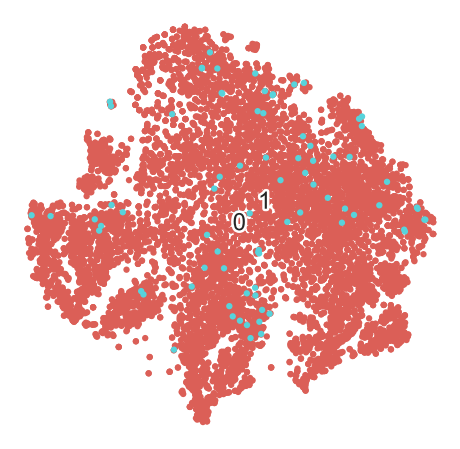

In [50]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE

# Random state.
RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
# We first reorder the data points according to the handwritten numbers.
digits_proj = TSNE(random_state=RS).fit_transform(X)
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
# plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()

## step2

In [75]:
X = np.vstack(np.array(X_ros))
y = np.hstack(np.array(y_ros))

In [76]:
X.shape

(14798, 90)

In [79]:
from sklearn.manifold import TSNE
RS = 20150101
digits_proj = TSNE(random_state=RS).fit_transform(X)

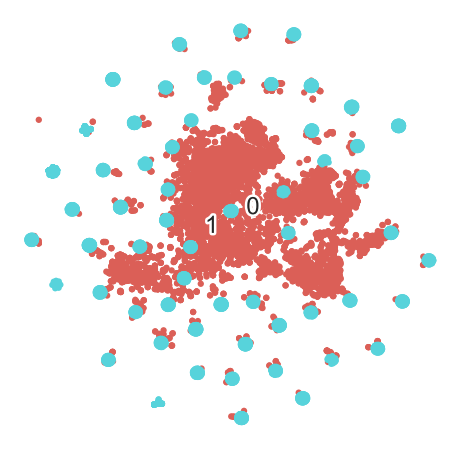

In [80]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE

# Random state.
RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
# We first reorder the data points according to the handwritten numbers.
digits_proj = TSNE(random_state=RS).fit_transform(X)
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
# plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()

## step3

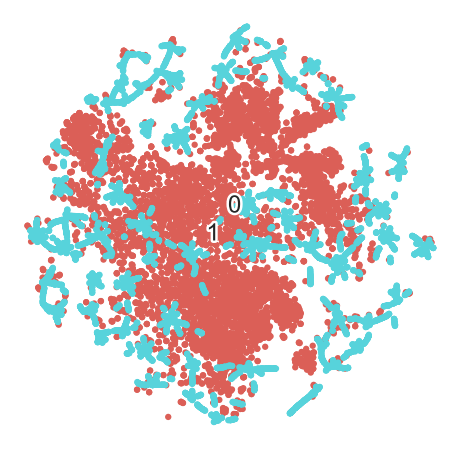

In [81]:
X = np.vstack(np.array(X_kos))
y = np.hstack(np.array(y_kos))
digits_proj = TSNE(random_state=RS).fit_transform(X)
# We import seaborn to make nice plots.
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
# We first reorder the data points according to the handwritten numbers.
digits_proj = TSNE(random_state=RS).fit_transform(X)
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
# plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()

## PCA

In [82]:
data_label.shape

(9943, 91)

In [83]:
data_label.head()

CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  INVENTORIES  \
0      0.005507      0.003256  0.004397    0.000324    0.000110     0.000950   
1      0.008286      0.042705  0.003678    0.003355    0.002627     0.010642   
4      0.012310      0.000533  0.012123    0.001297    0.001151     0.006702   
6      0.008168      0.000007  0.003597    0.000855    0.002063     0.003447   
7      0.000471      0.000178  0.000757    0.001124    0.000024     0.000708   

     OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  FIXED_ASSETS  \
0  0.005371  0.003294           0.003495          0.000875      0.003436   
1  0.000208  0.012058           0.003495          0.000576      0.003956   
4  0.007535  0.009263           0.000023          0.002801      0.003464   
6  0.015660  0.006531           0.003495          0.007207      0.002667   
7  0.000009  0.000580           0.003495          0.007207      0.000376   

        CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS   OTH_NCA     T_NCA  \
0  0.001259      0.001425     0.000149          0.000441  0.003670  0.002081   
1  0.000942      0.007876     0.001695          0.002336  0.003670  0.002872   
4  0.009820      0.006430     0.003754          0.000498  0.001788  0.006317   
6  0.000012      0.005309     0.005296          0.000215  0.000582  0.001959   
7  0.000115      0.000304     0.007070          0.000041  0.003670  0.000228   

   T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  ADVANCE_RECEIPTS  \
0  0.002702  0.017627       0.001012  0.000623          0.000209   
1  0.007788  0.017627       0.038526  0.009935          0.009342   
4  0.007871  0.000002       0.000796  0.002712          0.005618   
6  0.004389  0.004107       0.003178  0.003091          0.000954   
7  0.000385  0.000197       0.011533  0.000637          0.000011   

   PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE      T_CL  \
0         0.001506       0.140674     0.019081     0.000009  0.000388   
1         0.009313       0.145100     0.019081     0.002898  0.009252   
4         0.001345       0.143094     0.019081     0.001678  0.001991   
6         0.005812       0.140736     0.000518     0.000793  0.002340   
7         0.000153       0.140211     0.000043     0.000003  0.000228   

   DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  \
0       0.025819  0.033672  0.000430         0.006471       0.037866   
1       0.029435  0.034441  0.008295         0.011688       0.017691   
4       0.032379  0.035245  0.002188         0.014588       0.069748   
6       0.027767  0.035286  0.002500         0.005265       0.041376   
7       0.024628  0.033356  0.000218         0.001097       0.017746   

   SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  MINORITY_INT  \
0       0.001008           0.108256         0.026708      0.025315   
1       0.005618           0.115495         0.027297      0.025315   
4       0.004048           0.112624         0.038821      0.021610   
6       0.000524           0.109624         0.027928      0.018185   
7       0.000367           0.106603         0.019790      0.018114   

   T_SH_EQUITY  T_LIAB_EQUITY  C_PAID_OTH_FINAN_A  N_CF_FR_INVEST_A  \
0     0.022807       0.002702            0.005626          0.702701   
1     0.023295       0.007788            0.005626          0.700811   
4     0.033474       0.007871            0.005626          0.688394   
6     0.023850       0.004389            0.005626          0.699560   
7     0.017088       0.000385            0.000032          0.701667   

   C_FR_BORR  N_CF_OPERATE_A  C_PAID_INVEST  C_INF_FR_INVEST_A  C_PAID_G_S  \
0   0.000037        0.213304       0.001889           0.003162    0.000217   
1   0.013941        0.220885       0.003647           0.000841    0.004112   
4   0.001587        0.217950       0.008813           0.007431    0.000813   
6   0.003774        0.214881       0.003587           0.004766    0.001971   
7   0.000088        0.211521       0.003647           0.000799   

In [85]:
from sklearn.decomposition import PCA
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(data_label.drop(["FLAG"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(data_label.drop(["FLAG"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(data_label.drop(["FLAG"], axis=1)))

In [90]:
data_pca = data_label[:]

In [86]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [91]:
plotX = pd.concat([data_pca,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [92]:
plotX["dummy"] = 0

In [93]:
plotX.head()

CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  INVENTORIES  \
0      0.005507      0.003256  0.004397    0.000324    0.000110     0.000950   
1      0.008286      0.042705  0.003678    0.003355    0.002627     0.010642   
4      0.012310      0.000533  0.012123    0.001297    0.001151     0.006702   
6      0.008168      0.000007  0.003597    0.000855    0.002063     0.003447   
7      0.000471      0.000178  0.000757    0.001124    0.000024     0.000708   

     OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  FIXED_ASSETS  \
0  0.005371  0.003294           0.003495          0.000875      0.003436   
1  0.000208  0.012058           0.003495          0.000576      0.003956   
4  0.007535  0.009263           0.000023          0.002801      0.003464   
6  0.015660  0.006531           0.003495          0.007207      0.002667   
7  0.000009  0.000580           0.003495          0.007207      0.000376   

        CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS   OTH_NCA     T_NCA  \
0  0.001259      0.001425     0.000149          0.000441  0.003670  0.002081   
1  0.000942      0.007876     0.001695          0.002336  0.003670  0.002872   
4  0.009820      0.006430     0.003754          0.000498  0.001788  0.006317   
6  0.000012      0.005309     0.005296          0.000215  0.000582  0.001959   
7  0.000115      0.000304     0.007070          0.000041  0.003670  0.000228   

   T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  ADVANCE_RECEIPTS  \
0  0.002702  0.017627       0.001012  0.000623          0.000209   
1  0.007788  0.017627       0.038526  0.009935          0.009342   
4  0.007871  0.000002       0.000796  0.002712          0.005618   
6  0.004389  0.004107       0.003178  0.003091          0.000954   
7  0.000385  0.000197       0.011533  0.000637          0.000011   

   PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE      T_CL  \
0         0.001506       0.140674     0.019081     0.000009  0.000388   
1         0.009313       0.145100     0.019081     0.002898  0.009252   
4         0.001345       0.143094     0.019081     0.001678  0.001991   
6         0.005812       0.140736     0.000518     0.000793  0.002340   
7         0.000153       0.140211     0.000043     0.000003  0.000228   

   DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  CAPITAL_RESER  \
0       0.025819  0.033672  0.000430         0.006471       0.037866   
1       0.029435  0.034441  0.008295         0.011688       0.017691   
4       0.032379  0.035245  0.002188         0.014588       0.069748   
6       0.027767  0.035286  0.002500         0.005265       0.041376   
7       0.024628  0.033356  0.000218         0.001097       0.017746   

   SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  MINORITY_INT  \
0       0.001008           0.108256         0.026708      0.025315   
1       0.005618           0.115495         0.027297      0.025315   
4       0.004048           0.112624         0.038821      0.021610   
6       0.000524           0.109624         0.027928      0.018185   
7       0.000367           0.106603         0.019790      0.018114   

   T_SH_EQUITY  T_LIAB_EQUITY  C_PAID_OTH_FINAN_A  N_CF_FR_INVEST_A  \
0     0.022807       0.002702            0.005626          0.702701   
1     0.023295       0.007788            0.005626          0.700811   
4     0.033474       0.007871            0.005626          0.688394   
6     0.023850       0.004389            0.005626          0.699560   
7     0.017088       0.000385            0.000032          0.701667   

   C_FR_BORR  N_CF_OPERATE_A  C_PAID_INVEST  C_INF_FR_INVEST_A  C_PAID_G_S  \
0   0.000037        0.213304       0.001889           0.003162    0.000217   
1   0.013941        0.220885       0.003647           0.000841    0.004112   
4   0.001587        0.217950       0.008813           0.007431    0.000813   
6   0.003774        0.214881       0.003587           0.004766    0.001971   
7   0.000088        0.211521       0.003647           0.000799   

In [94]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["FLAG"] == 0]
cluster1 = plotX[plotX["FLAG"] == 1]

#This is needed so we can display plotly plots properly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [95]:
#plotly imports
from sklearn.decomposition import PCA #Principal Component Analysis
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [98]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [100]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)


data = [trace1, trace2]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [106]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in Three Dimensions Using T-SNE"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### pca2

In [109]:
from sklearn.decomposition import PCA
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(data_new.drop(["FLAG"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(data_new.drop(["FLAG"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(data_new.drop(["FLAG"], axis=1)))

PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([data_new,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["FLAG"] == 0]
cluster1 = plotX[plotX["FLAG"] == 1]

#This is needed so we can display plotly plots properly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)


data = [trace1, trace2]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [110]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in Three Dimensions Using T-SNE"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# 样本不平衡问题处理

这一步的原因：我们已经知道数据严重不平衡，因此必须要样本均衡

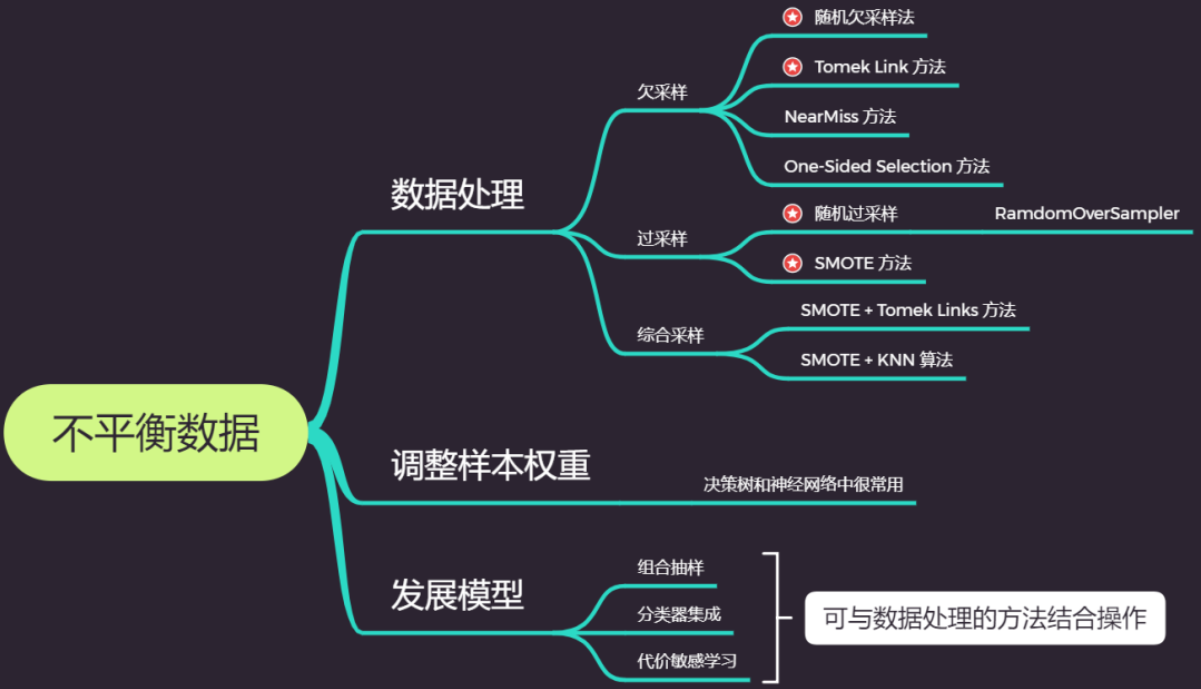

## 过采样

过采样：通过增加样本中小类样本的数据量来实现样本均衡。其中较为简单的方式是直接复制小类样本，形成数量上的均衡。但实际上，并没有为模型引入更多数据，过分强调正比例数据，会放大正比例噪音对模型的影响。即随机过采样采取简单复制样本的策略来增加少数类样本，这样容易产生模型过拟合的问题，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)。

### 随机过采样 

In [206]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler   # 随机过采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
ros = RandomOverSampler(random_state=0,sampling_strategy='auto')  # 随机过采样
X_ros, y_ros = ros.fit_resample(X_tr, Y_tr)
print('随机过采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_ros)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
随机过采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


### SMOTE

SMOTE（Synthetic Minority Oversampling Technique）即合成少数类，它是基于随机过采样算法的一种改进方案，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。利用了K近邻的思想。    
算法流程如下：  
(1)对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。  
(2)根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，假设选择的近邻为xn。  
(3)对于每一个随机选出的近邻xn，分别与原样本按照如下的公式构建新的样本。  
优缺点：  
虽然加强了原始数据中小众的占比，但增加了类之间重叠的可能性，模糊了正负类边界，且容易生成一些没有提供有益信息的样本。

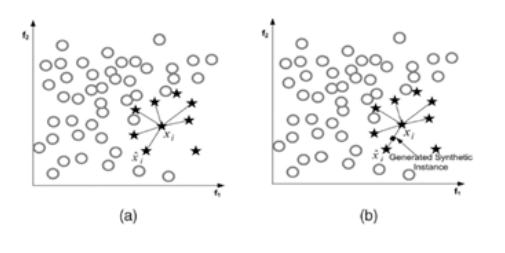

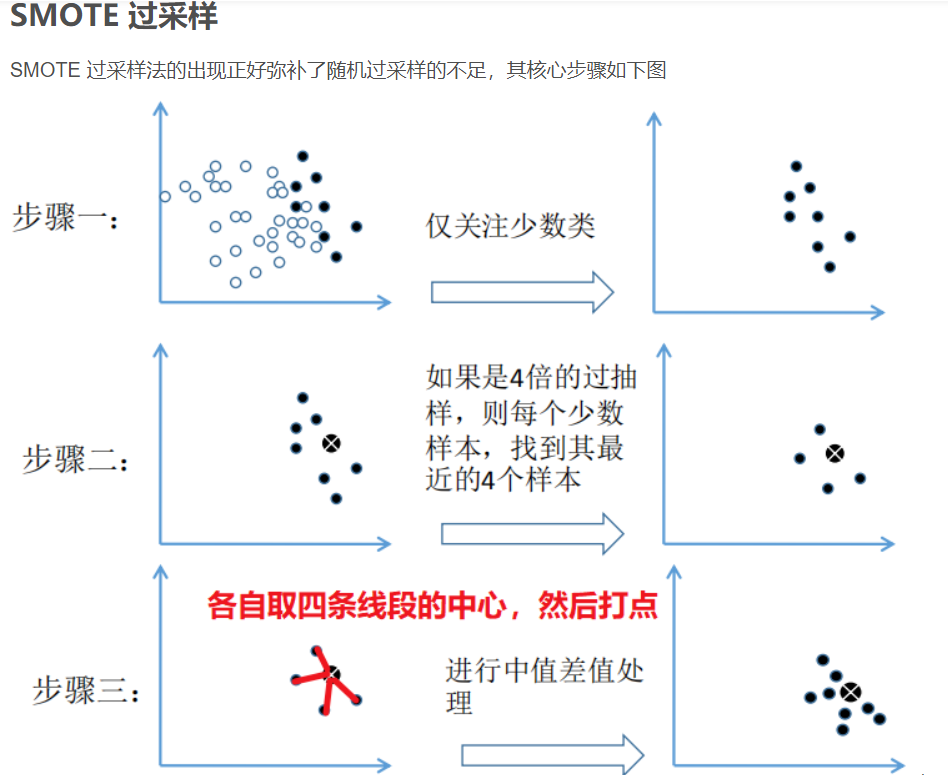

In [207]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)
print('SMOTE采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_sos)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
SMOTE采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


## 欠采样

欠采样：通过减少多数类样本的样本数量来实现样本均衡。其中比较简单直接的方法就是随机去掉一些数据来减少多数类样本的规模，但这种方法可能会丢失一些重要的信息。还有一种方法就是，假设少数类样本数量为N，那就将多数类样本分为N个簇，取每个簇的中心点作为多数类的新样本，再加上少数类的所有样本进行训练。这样就可以保证了多数类样本在特征空间的分布特性。

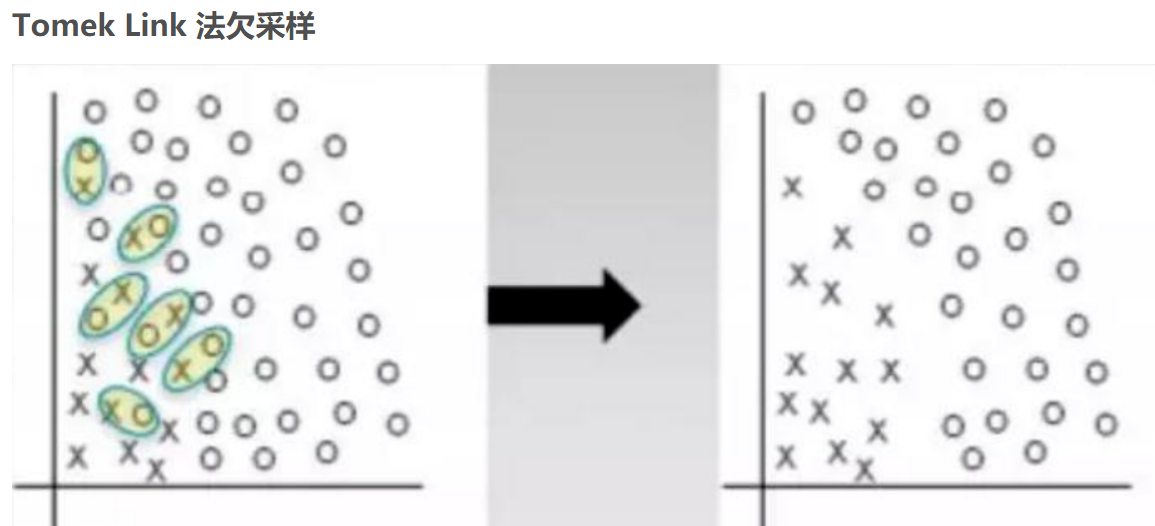

In [208]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler # 随机欠采样函数
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_tr, Y_tr)
print('欠采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_rus)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
欠采样后，训练集 y_ros 中的分类情况：Counter({0: 58, 1: 58})


## 综合采样

目前为止我们使用的重采样方法几乎都是只针对某一类样本：对大众样本欠采样，对小众样本过采样。也经常有人将欠采样和过采样综合起来，解决样本类别分布不平衡和过拟合问题，如：SMOTE + Tomek links或SMOTE + ENN。即利用SMOTE方法生成新的小众样本，得到扩充后的数据集T，再用Tomek links方法剔除T中的Tomek links对，或利用ENN算法剔除T中超过一半近邻点都不属于大众样本的样本点。  
优缺点：  
增加了小众样本的数量，且减少了不同类别之间的样本重叠。

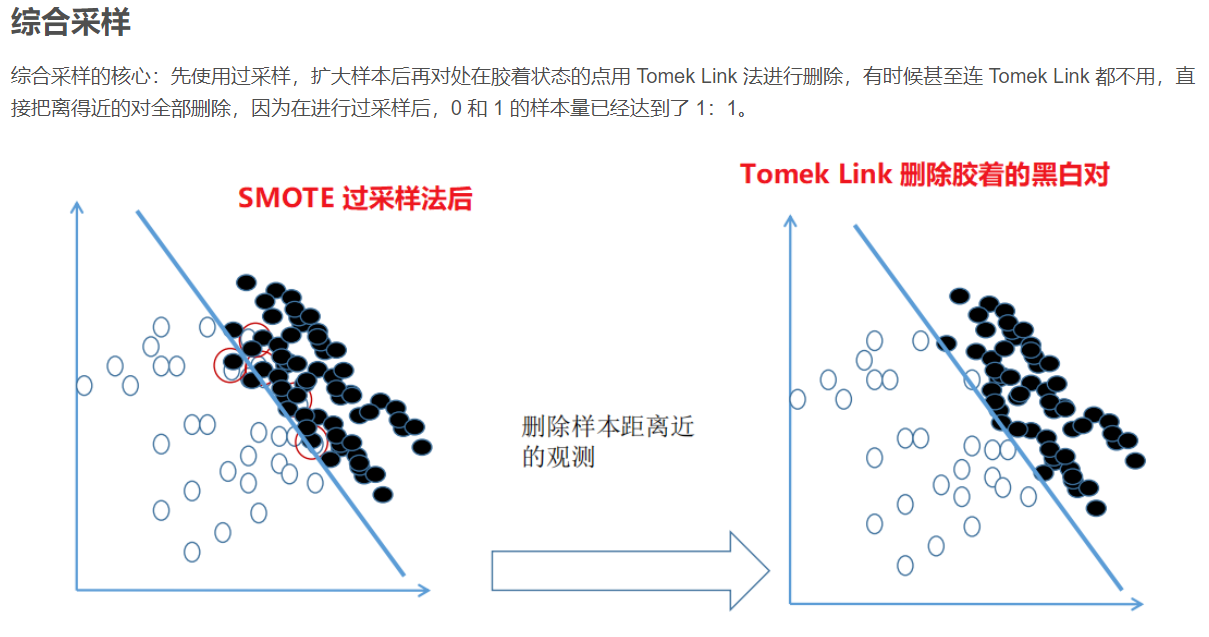

In [209]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek   # 综合采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_tr, Y_tr)
print('综合采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_kos)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
综合采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


data_new = pd.concat([X_kos,y_kos],axis=1)

# 模型

问题1：确定出各行业与财务数据造假相关的数据指标，并分析比较不同行业上市公司相关数据指标的异同。  
我们的思路是：利用Adaboost、RandomForest等模型提取出重要特征，然后取它们的前10个共有特征。

问题2：确定出第 6 年财务数据造假的上市公司。  
我们的思路是：  
（1）直接根据模型的训练去预测出第6年  
（2）从模型中提取出更重要的指标后，再重新训练模型，再进行预测  
目前只采用了第一种方法

## Adaboost模型

In [210]:
from sklearn.ensemble import AdaBoostClassifier

list = [[X_ros, y_ros],[X_sos, y_sos],[X_rus, y_rus],[X_kos, y_kos]]
for i in list:
    clf = AdaBoostClassifier(n_estimators=20, random_state=2)
    clf.fit(i[0], i[1])
    pre = clf.predict(X_te)
    acc_te = sum(pre == Y_te)/len(pre)
    print('测试集的准确率',acc_te)

测试集的准确率 0.8519710378117458
测试集的准确率 0.9010458567980691
测试集的准确率 0.6584875301689461
测试集的准确率 0.9010458567980691


### 综合采样的Adaboost特征重要性

In [211]:
clf = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
clf.fit(X_kos, y_kos)

AdaBoostClassifier(learning_rate=0.3, n_estimators=500, random_state=2)

In [212]:
pre = clf.predict(X_te)
acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

测试集的准确率 0.9666130329847143


In [213]:
a = {'pre':pre,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

pre  true
16805    0     1
17964    0     1
8675     0     1
11167    0     1
9540     0     1
9067     0     1
17683    0     1
5133     0     1
7548     0     1
10379    0     1
11927    0     1
6261     0     1
7716     0     1
285      0     1
10678    0     1
9212     0     1
8952     0     1
12897    0     1
7177     1     1
16691    0     1
14340    0     1
13199    0     1

准确率高达97%，那是因为它预测为0了，都预测不准1，0的样本量大，所以拉高了准确率

<Figure size 432x288 with 0 Axes>

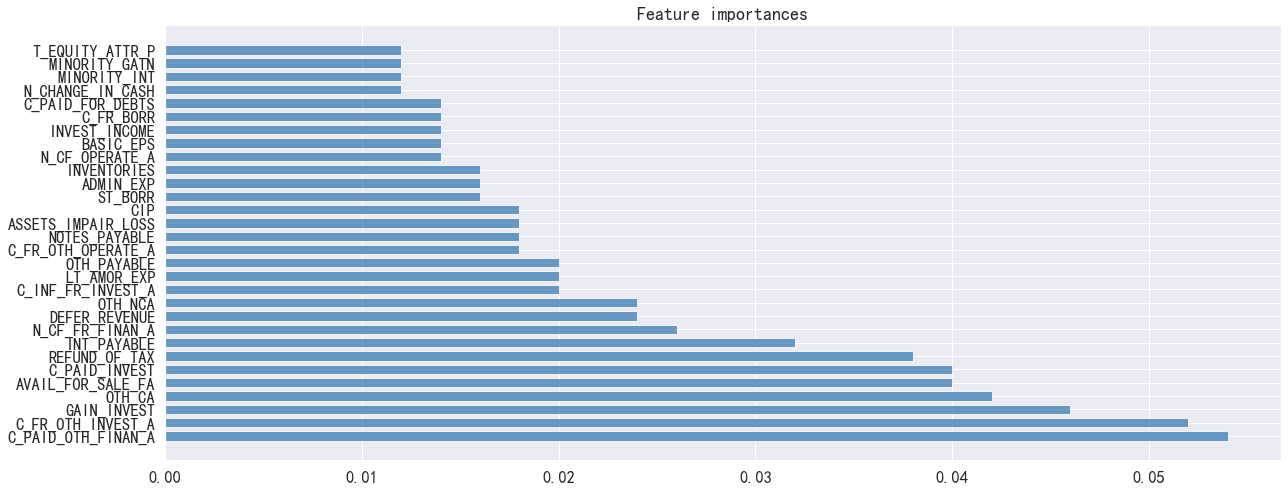

In [195]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(clf.feature_importances_)[::-1]  # 先将值按大小排序再提取索引

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("Feature importances")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

data_show = data_label.iloc[:,:]
plt.barh(range(30), clf.feature_importances_[indices][:30], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(30), data_show.columns.values[:][indices][:30])
# plt.xlim([0, max(clf.feature_importances_[indices])])

plt.show()

In [196]:
adaboost_features = []
for i in data_show.columns.values[:][indices][:40]:
    adaboost_features.append(i)
print(adaboost_features)

['C_PAID_OTH_FINAN_A', 'C_FR_OTH_INVEST_A', 'GAIN_INVEST', 'OTH_CA', 'AVAIL_FOR_SALE_FA', 'C_PAID_INVEST', 'REFUND_OF_TAX', 'INT_PAYABLE', 'N_CF_FR_FINAN_A', 'DEFER_REVENUE', 'OTH_NCA', 'C_INF_FR_INVEST_A', 'LT_AMOR_EXP', 'OTH_PAYABLE', 'C_FR_OTH_OPERATE_A', 'NOTES_PAYABLE', 'ASSETS_IMPAIR_LOSS', 'CIP', 'ST_BORR', 'ADMIN_EXP', 'INVENTORIES', 'N_CF_OPERATE_A', 'BASIC_EPS', 'INVEST_INCOME', 'C_FR_BORR', 'C_PAID_FOR_DEBTS', 'N_CHANGE_IN_CASH', 'MINORITY_INT', 'MINORITY_GAIN', 'T_EQUITY_ATTR_P', 'RETAINED_EARNINGS', 'PUR_FIX_ASSETS_OTH', 'PAID_IN_CAPITAL', 'C_PAID_TO_FOR_EMPL', 'PREPAYMENT', 'NOTES_RECEIV', 'AR', 'CASH_C_EQUIV', 'T_LIAB', 'T_CL']


In [235]:
pd.DataFrame(adaboost_features).to_csv('1.csv')

## RandomForest模型

### 综合采样下

In [197]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=2)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
print('pre:',pre)
acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

pre: [0 0 0 ... 1 1 0]
测试集的准确率 0.8390989541432019


<Figure size 432x288 with 0 Axes>

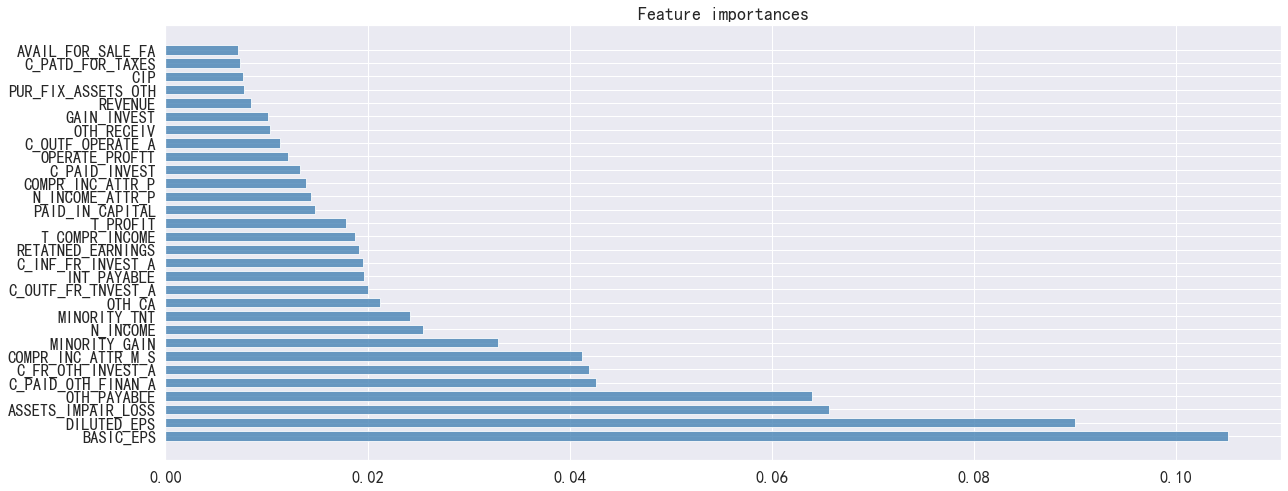

In [198]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(clf.feature_importances_)[::-1]

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("Feature importances")
#plt.barh()

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

data_show = data_label.iloc[:,:]
plt.barh(range(30), clf.feature_importances_[indices][:30], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(30), data_show.columns.values[:][indices][:30])
# plt.xlim([0, max(clf.feature_importances_[indices])])

plt.show()

In [199]:
RF_features = []
for i in data_show.columns.values[:][indices][:40]:
    RF_features.append(i)
print(RF_features)

['BASIC_EPS', 'DILUTED_EPS', 'ASSETS_IMPAIR_LOSS', 'OTH_PAYABLE', 'C_PAID_OTH_FINAN_A', 'C_FR_OTH_INVEST_A', 'COMPR_INC_ATTR_M_S', 'MINORITY_GAIN', 'N_INCOME', 'MINORITY_INT', 'OTH_CA', 'C_OUTF_FR_INVEST_A', 'INT_PAYABLE', 'C_INF_FR_INVEST_A', 'RETAINED_EARNINGS', 'T_COMPR_INCOME', 'T_PROFIT', 'PAID_IN_CAPITAL', 'N_INCOME_ATTR_P', 'COMPR_INC_ATTR_P', 'C_PAID_INVEST', 'OPERATE_PROFIT', 'C_OUTF_OPERATE_A', 'OTH_RECEIV', 'GAIN_INVEST', 'REVENUE', 'PUR_FIX_ASSETS_OTH', 'CIP', 'C_PAID_FOR_TAXES', 'AVAIL_FOR_SALE_FA', 'T_NCA', 'NOPERATE_INCOME', 'NOPERATE_EXP', 'C_OUTF_FR_FINAN_A', 'N_CF_FR_INVEST_A', 'PREPAYMENT', 'C_INF_FR_OPERATE_A', 'FINAN_EXP', 'T_NCL', 'DISP_FIX_ASSETS_OTH']


In [237]:
pd.DataFrame(RF_features).to_csv('2.csv')

我们从以上两个模型中可知存在一些共有的重要指标，因此可用它们作为第一问的识别相关指标

## BP神经网络

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
print(tf.__version__)
Y = pd.get_dummies(y_kos).values
model = Sequential()
model.add(Dense(16, input_shape=(90,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_kos, Y, epochs=50)
y_pred = model.predict(X_te)
y_pred_class = np.argmax(y_pred, axis=1)  # 其实就是记录每个数组中值最大的数的index

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
print(tf.__version__)

In [ ]:
X_kos.shape

In [ ]:
Y = pd.get_dummies(y_kos).values

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(16, input_shape=(90,), activation='relu'))

In [ ]:
model.add(Dense(8, activation='relu'))

In [ ]:
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_kos, Y, epochs=50)

In [ ]:
y_pred = model.predict(X_te)

In [ ]:
y_pred_class = np.argmax(y_pred, axis=1)  # 其实就是记录每个数组中值最大的数的index

In [ ]:
a = {'pre':y_pred_class,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

a[a['true']==0].sample(20)

acc_te = sum(y_pred_class == Y_te)/len(y_pred_class)
print('测试集的准确率',acc_te)

我们发现BP神经的话容易把0预测成为1

过拟合出现的原因  
（1）建模样本选取有误，如样本数量太少，选样方法错误，样本标签错误等，导致选取的样本数据不足以代表预定的分类规则；  

（2）样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则；  
 
（3）假设的模型无法合理存在，或者说是假设成立的条件实际并不成立；  

（4）参数太多，模型复杂度过高  

神经网络太不稳定了，应该是采样问题

## LightBGM

In [47]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据
iris = load_iris()
data = iris.data
target = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
# print("Train data length:", len(X_train))
# print("Test data length:", len(X_test))

# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_kos, y_kos)
lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)

In [85]:
# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.04,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)

# 模型保存
# gbm.save_model('model.txt')

# 模型加载
# gbm = lgb.Booster(model_file='model.txt')

# 模型预测
y_pred = gbm.predict(X_te, num_iteration=gbm.best_iteration)

# 模型评估
# print('The rmse of prediction is:', mean_squared_error(Y_te, y_pred) ** 0.5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22950
[LightGBM] [Info] Number of data points in the train set: 14798, number of used features: 90
[LightGBM] [Info] Start training from score 0.500000
[1]	valid_0's l2: 0.234655	valid_0's auc: 0.656167
Training until validation scores don't improve for 300 rounds
[2]	valid_0's l2: 0.221085	valid_0's auc: 0.727642
[3]	valid_0's l2: 0.208187	valid_0's auc: 0.729302
[4]	valid_0's l2: 0.196294	valid_0's auc: 0.711436
[5]	valid_0's l2: 0.185552	valid_0's auc: 0.705274
[6]	valid_0's l2: 0.175231	valid_0's auc: 0.702498
[7]	valid_0's l2: 0.165569	valid_0's auc: 0.701806
[8]	valid_0's l2: 0.15716	valid_0's auc: 0.67645
[9]	valid_0's l2: 0.148814	valid_0's auc: 0.677584
[10]	valid_0's l2: 0.141337	valid_0's auc: 0.67478
[11]	valid_0's l2: 0.134022	valid_0's auc: 0.674983
[12]	valid_0's l2: 0.12748	valid

[170]	valid_0's l2: 0.0220598	valid_0's auc: 0.500443
[171]	valid_0's l2: 0.0220424	valid_0's auc: 0.500314
[172]	valid_0's l2: 0.0220262	valid_0's auc: 0.498967
[173]	valid_0's l2: 0.0219919	valid_0's auc: 0.498875
[174]	valid_0's l2: 0.021969	valid_0's auc: 0.498967
[175]	valid_0's l2: 0.0219366	valid_0's auc: 0.498598
[176]	valid_0's l2: 0.0218725	valid_0's auc: 0.498247
[177]	valid_0's l2: 0.0218479	valid_0's auc: 0.498284
[178]	valid_0's l2: 0.0217889	valid_0's auc: 0.498432
[179]	valid_0's l2: 0.0217735	valid_0's auc: 0.498506
[180]	valid_0's l2: 0.0217592	valid_0's auc: 0.498247
[181]	valid_0's l2: 0.0217253	valid_0's auc: 0.498063
[182]	valid_0's l2: 0.0217043	valid_0's auc: 0.497823
[183]	valid_0's l2: 0.0216731	valid_0's auc: 0.498819
[184]	valid_0's l2: 0.0216568	valid_0's auc: 0.497786
[185]	valid_0's l2: 0.0216397	valid_0's auc: 0.495075
[186]	valid_0's l2: 0.0215881	valid_0's auc: 0.494207
[187]	valid_0's l2: 0.0215708	valid_0's auc: 0.494078
[188]	valid_0's l2: 0.0215562

In [86]:
a = []
for i in y_pred:
    if i<=0.5:
        a.append(0)
    else:
        a.append(1)

In [87]:
acc_te = sum(a == Y_te)/len(a)
print('测试集的准确率',acc_te)

测试集的准确率 0.915526950925181


In [88]:
b = {'pre':a,'true':Y_te}
b = pd.DataFrame(b)
b[b['true']==1]

pre  true
16805    0     1
17964    0     1
8675     0     1
11167    0     1
9540     0     1
9067     0     1
17683    1     1
5133     0     1
7548     0     1
10379    1     1
11927    0     1
6261     0     1
7716     0     1
285      0     1
10678    0     1
9212     0     1
8952     1     1
12897    0     1
7177     0     1
16691    0     1
14340    1     1
13199    0     1

In [89]:
b[b['true']==0]

pre  true
14286    0     0
2881     0     0
1681     0     0
532      0     0
6209     0     0
4195     0     0
17736    0     0
4985     0     0
16069    1     0
13070    0     0
724      0     0
2738     0     0
12508    0     0
7589     1     0
16882    0     0
5479     0     0
8556     0     0
7372     0     0
13337    0     0
1555     0     0
9866     0     0
4473     0     0
10706    0     0
15181    0     0
14403    0     0
12048    0     0
4837     0     0
5314     0     0
4452     0     0
3353     0     0
8540     0     0
17518    0     0
5786     0     0
15644    1     0
4800     0     0
14415    0     0
3958     0     0
16761    0     0
5492     0     0
12344    0     0
9265     1     0
3230     0     0
9932     0     0
1094     0     0
4319     0     0
538      0     0
4043     1     0
500      0     0
10071    0     0
16798    0     0
7707     0     0
1520     0     0
7449     0     0
17249    0     0
13587    0     0
8329     1     0
11728    0     0
12397    0     0
3688     0     0
11640    0     0
14727    0     0
11439    0     0
17563    1     0
1502     0     0
9732     0     0
9545     0     0
6298     0     0
4415     0     0
8320     0     0
15049    0     0
10235    0     0
14261    0     0
2253     1     0
16793    0     0
9891     0     0
16121    0     0
423      0     0
417      1     0
16374    0     0
6852     0     0
11598    0     0
1447     0     0
15033    0     0
2866     1     0
15973    0     0
4878     0     0
9670     0     0
7522     0     0
7445     0     0
766      0     0
13945    0     0
11301    0     0
10476    0     0
12488    0     0
16977    0     0
5668     0     0
14227    0     0
16913    0     0
13342    0     0
7438     0     0
9687     0     0
15661    0     0
13447    0     0
13599    0     0
11527    0     0
14892    0     0
7797     0     0
11053    0     0
4365     0     0
9513     0     0
7526     0     0
8230     0     0
5751     0     0
11669    0     0
16942    1     0
8474     0     0
15724    0     0
1201     1     0
4375     0     0
5628     0     0
10558    0     0
2806     0     0
17720    0     0
17273    0     0
8891     0     0
7798     0     0
16136    0     0
16733    0     0
1807     0     0
9193     0     0
8888     0     0
9000     0     0
15243    1     0
7296     0     0
4030     0     0
3539     0     0
1187     0     0
12775    0     0
17613    0     0
12351    0     0
5747     0     0
2690     0     0
11048    0     0
17944    0     0
4198     0     0
557      0     0
13601    0     0
6238     0     0
4586     0     0
3206     0     0
3405     0     0
14996    0     0
16543    0     0
10067    0     0
15824    0     0
5422     0     0
17764    0     0
1772     0     0
8578     0     0
15983    0     0
17959    0     0
5438     0     0
1524     0     0
15013    0     0
3675     0     0
3864     0     0
13056    0     0
3549     0     0
16387    0     0
11122    0     0
1131     0     0
1473     0     0
3624     0     0
17810    0     0
5829     1     0
5334     0     0
16002    0     0
9804     1     0
7770     0     0
12527    0     0
13921    0     0
12429    0     0
17771    0     0
11724    0     0
17280    1     0
11902    0     0
2115     0     0
16207    0     0
13116    0     0
10968    0     0
6481     0     0
5965     0     0
6336     0     0
11870    0     0
2059     0     0
4864     0     0
8337     1     0
11190    0     0
11195    0     0
4795     0     0
7029     1     0
5667     0     0
14871    0     0
15631    0     0
13527    0     0
3680     0     0
10041    0     0
11284    1     0
10019    0     0
10440    0     0
1934     0     0
11029    0     0
15334    0     0
5579     0     0
8047     0     0
1601     0     0
241      0     0
14406    0     0
12154    0     0
3093     0     0
12590    0     0
11469    0     0
11135    0     0
12995    0     0
17674    0     0
13130    0     0
15548    0     0
3517     0     0
17856    0     0
2156     0     0
7376     0     0
1735     0     0
14132    0     0
13155    1     0
12223    0  

In [76]:
clf.feature_importances_

array([10, 19,  7, 21,  7, 14, 31, 11, 35, 19, 11, 25,  6, 37,  4, 32,  5,
        3,  9, 30,  8, 16, 12, 18, 47, 28,  6, 28, 10,  2, 13, 27, 18, 21,
       10, 32,  4,  0, 42, 16, 12, 12, 40, 41,  6, 11, 11, 32,  6, 36, 21,
       30,  8,  4, 63, 15, 26, 22, 21, 22, 32,  6,  4, 15, 11, 17, 15,  9,
       26,  9,  0,  4, 18,  9, 28,  4,  1,  5, 24, 10,  6,  5,  5, 11, 24,
        8, 22, 22, 13,  4])

In [79]:
import numpy as np

In [80]:
lgb_features = []
indices = np.argsort(clf.feature_importances_)[::-1]
for i in data_label.columns.values[:][indices][:40]:
    lgb_features.append(i)
print(lgb_features)

['C_FR_OTH_INVEST_A', 'INT_PAYABLE', 'C_PAID_OTH_FINAN_A', 'C_INF_FR_INVEST_A', 'C_PAID_INVEST', 'LT_AMOR_EXP', 'GAIN_INVEST', 'AVAIL_FOR_SALE_FA', 'N_CF_FR_FINAN_A', 'OTH_NCA', 'MINORITY_INT', 'REFUND_OF_TAX', 'OTH_CA', 'FOREX_EFFECTS', 'NOTES_PAYABLE', 'ASSETS_IMPAIR_LOSS', 'OTH_PAYABLE', 'DEFER_REVENUE', 'CAPITAL_RESER', 'C_FR_OTH_OPERATE_A', 'DILUTED_EPS', 'CIP', 'INVEST_INCOME', 'NOPERATE_EXP', 'INCOME_TAX', 'C_OUTF_FR_INVEST_A', 'NOPERATE_INCOME', 'DISP_FIX_ASSETS_OTH', 'C_PAID_FOR_DEBTS', 'N_CHANGE_IN_CASH', 'RETAINED_EARNINGS', 'PREPAYMENT', 'LT_EQUITY_INVEST', 'NOTES_RECEIV', 'BASIC_EPS', 'SURPLUS_RESER', 'TAXES_PAYABLE', 'C_PAID_TO_FOR_EMPL', 'N_CF_FR_INVEST_A', 'ADVANCE_RECEIPTS']


In [81]:
pd.DataFrame(lgb_features).to_csv('3.csv')

In [32]:
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型 
clf = LGBMClassifier(learning_rate=0.4,boosting_type='gbdt',n_estimators=50,silent=True)
# 在训练集上训练LightGBM模型

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'max_depth': 4,
    'min_child_weight': 6,
    'num_leaves': 16,
    'learning_rate': 0.02,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    #'lambda_l1':0.25,
    #'lambda_l2':0.5,
    #'scale_pos_weight':1,
}

clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
print('pre:',pre)
acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

pre: [0 0 0 ... 0 0 0]
测试集的准确率 0.9903459372485921


In [33]:
a = {'pre':pre,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

pre  true
16805    0     1
17964    0     1
8675     0     1
11167    0     1
9540     0     1
9067     0     1
17683    0     1
5133     0     1
7548     0     1
10379    0     1
11927    0     1
6261     0     1
7716     0     1
285      0     1
10678    0     1
9212     0     1
8952     0     1
12897    0     1
7177     0     1
16691    0     1
14340    0     1
13199    0     1

In [35]:
clf.feature_importances_

array([10, 19,  7, 21,  7, 14, 31, 11, 35, 19, 11, 25,  6, 37,  4, 32,  5,
        3,  9, 30,  8, 16, 12, 18, 47, 28,  6, 28, 10,  2, 13, 27, 18, 21,
       10, 32,  4,  0, 42, 16, 12, 12, 40, 41,  6, 11, 11, 32,  6, 36, 21,
       30,  8,  4, 63, 15, 26, 22, 21, 22, 32,  6,  4, 15, 11, 17, 15,  9,
       26,  9,  0,  4, 18,  9, 28,  4,  1,  5, 24, 10,  6,  5,  5, 11, 24,
        8, 22, 22, 13,  4])

# 想到的改进点：

**1、 很多论文都是使用到XXX率来训练模型，但是我们这里缺失值太多了，如果删除50%，那么XXX率就被删除很多，我们到底应不应该删除XXX率，还是填充？  
2、 样本均衡后还是存在过拟合
3、采用集成学习stacking
4、样本空间重叠**

# 改进点

**1、最大最小归一化换成标准化  
2、猜测1、0样本空间分布是混杂的，采用降维观察它们的分布情况  
3、提取重要特征再训练模型  
4、组合模型  
5、从论文中提取指标  
6、Filter特征过滤（LinearSVC）  
7、统计检验，剔除不存在显著差异的指标  
8、根据石小军[53]和郭淑彬[54]的研究发现，针对我国上市公司的实际情况，选择少数类与多数类的样本比例达到 1:3 时，模型泛化能力最好。所以，本文在样本数据选择时，采用 1:3 的比例选择了被特别处理的制造业上市公司和正常经营的企业。  
<font color=red>9、不删除后面的那些XXX率，手动选择一些，然后用随机森林直接跑，应该也能跑出来  
10、提取重要特征后+后面的指标去跑</font>**

# 改进ing

In [200]:
print('adaboost提取出的特征：',adaboost_features)
print()
print('randomforest提取出的特征：',RF_features)

adaboost提取出的特征： ['C_PAID_OTH_FINAN_A', 'C_FR_OTH_INVEST_A', 'GAIN_INVEST', 'OTH_CA', 'AVAIL_FOR_SALE_FA', 'C_PAID_INVEST', 'REFUND_OF_TAX', 'INT_PAYABLE', 'N_CF_FR_FINAN_A', 'DEFER_REVENUE', 'OTH_NCA', 'C_INF_FR_INVEST_A', 'LT_AMOR_EXP', 'OTH_PAYABLE', 'C_FR_OTH_OPERATE_A', 'NOTES_PAYABLE', 'ASSETS_IMPAIR_LOSS', 'CIP', 'ST_BORR', 'ADMIN_EXP', 'INVENTORIES', 'N_CF_OPERATE_A', 'BASIC_EPS', 'INVEST_INCOME', 'C_FR_BORR', 'C_PAID_FOR_DEBTS', 'N_CHANGE_IN_CASH', 'MINORITY_INT', 'MINORITY_GAIN', 'T_EQUITY_ATTR_P', 'RETAINED_EARNINGS', 'PUR_FIX_ASSETS_OTH', 'PAID_IN_CAPITAL', 'C_PAID_TO_FOR_EMPL', 'PREPAYMENT', 'NOTES_RECEIV', 'AR', 'CASH_C_EQUIV', 'T_LIAB', 'T_CL']

randomforest提取出的特征： ['BASIC_EPS', 'DILUTED_EPS', 'ASSETS_IMPAIR_LOSS', 'OTH_PAYABLE', 'C_PAID_OTH_FINAN_A', 'C_FR_OTH_INVEST_A', 'COMPR_INC_ATTR_M_S', 'MINORITY_GAIN', 'N_INCOME', 'MINORITY_INT', 'OTH_CA', 'C_OUTF_FR_INVEST_A', 'INT_PAYABLE', 'C_INF_FR_INVEST_A', 'RETAINED_EARNINGS', 'T_COMPR_INCOME', 'T_PROFIT', 'PAID_IN_CAPITAL'

In [201]:
n=0
new_colunms = []
for i in adaboost_features:
    if i in RF_features:
        n += 1
        new_colunms.append(i)
print(new_colunms)
print(n)

['C_PAID_OTH_FINAN_A', 'C_FR_OTH_INVEST_A', 'GAIN_INVEST', 'OTH_CA', 'AVAIL_FOR_SALE_FA', 'C_PAID_INVEST', 'INT_PAYABLE', 'C_INF_FR_INVEST_A', 'OTH_PAYABLE', 'ASSETS_IMPAIR_LOSS', 'CIP', 'BASIC_EPS', 'MINORITY_INT', 'MINORITY_GAIN', 'RETAINED_EARNINGS', 'PUR_FIX_ASSETS_OTH', 'PAID_IN_CAPITAL', 'PREPAYMENT']
18


In [202]:
clf = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
clf.fit(X_kos[new_colunms], y_kos)

AdaBoostClassifier(learning_rate=0.3, n_estimators=500, random_state=2)

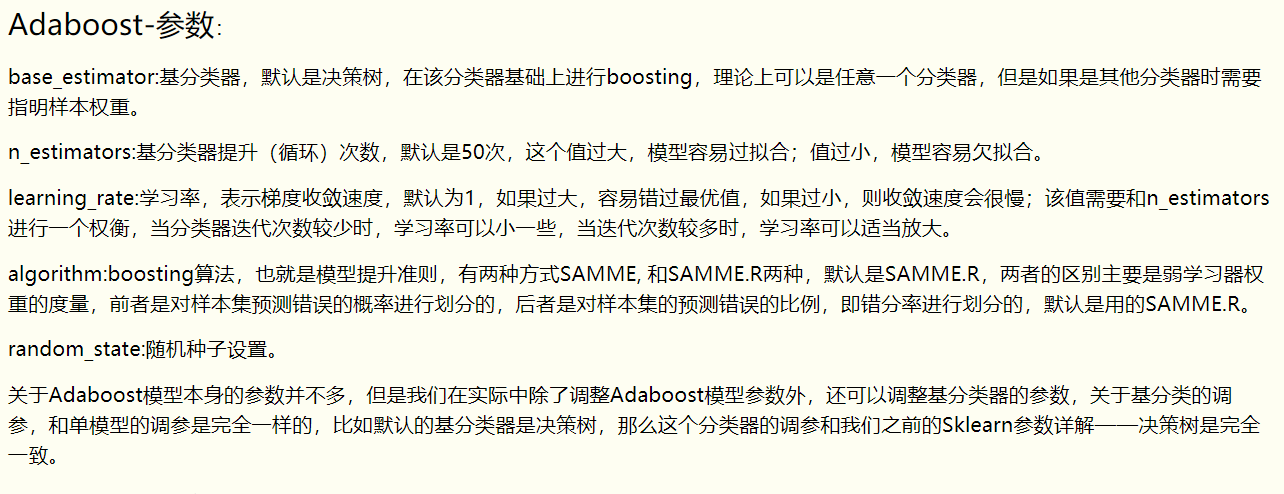

In [203]:
pre = clf.predict(X_te[new_colunms])
acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

测试集的准确率 0.9497184231697506


In [204]:
a = {'pre':pre,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

pre  true
16805    0     1
17964    0     1
8675     0     1
11167    1     1
9540     0     1
9067     0     1
17683    0     1
5133     0     1
7548     0     1
10379    0     1
11927    0     1
6261     0     1
7716     0     1
285      0     1
10678    0     1
9212     0     1
8952     0     1
12897    0     1
7177     1     1
16691    0     1
14340    0     1
13199    0     1

In [205]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=2)
clf.fit(X_kos[new_colunms], y_kos)
pre = clf.predict(X_te[new_colunms])
print('pre:',pre)
acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

pre: [0 0 0 ... 0 0 0]
测试集的准确率 0.8539823008849557


In [206]:
a = {'pre':pre,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

pre  true
16805    0     1
17964    1     1
8675     0     1
11167    0     1
9540     1     1
9067     1     1
17683    0     1
5133     1     1
7548     0     1
10379    1     1
11927    0     1
6261     0     1
7716     0     1
285      0     1
10678    0     1
9212     0     1
8952     0     1
12897    0     1
7177     1     1
16691    0     1
14340    0     1
13199    0     1

# 提取制造业含XX率

In [268]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_rate = pd.read_csv('制造业清洗完成的数据.csv')

In [271]:
data_rate.head()

Unnamed: 0  TICKER_SYMBOL 所属行业  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  \
0           0         4019.0  制造业            3             3             2   
1           1         8166.0  制造业            3             3             2   
2           4        11737.0  制造业            3             3             2   
3           6        16479.0  制造业            3             3             2   
4           7        16842.0  制造业            4             4             3   

   END_DATE REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS  \
0         1           A             12            1           CHAS_2007   
1         1           A             12            1           CHAS_2007   
2         1           A             12            1           CHAS_2007   
3         1           A             12            1           CHAS_2007   
4         1           A             12            1           CHAS_2007   

  CURRENCY_CD  CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  \
0         CNY      0.005419      0.003256  0.004008    0.000324    0.000110   
1         CNY      0.008153      0.042705  0.003353    0.003355    0.002627   
2         CNY      0.012113      0.000533  0.011052    0.001297    0.001151   
3         CNY      0.008037      0.000007  0.003279    0.000855    0.002063   
4         CNY      0.000464      0.000178  0.000690    0.001124    0.000024   

   INVENTORIES    OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  \
0     0.000815  0.001926  0.002836           0.003413          0.000833   
1     0.009129  0.000137  0.010381           0.003413          0.000548   
2     0.005749  0.004962  0.007975           0.000023          0.002666   
3     0.002957  0.010312  0.005623           0.003413          0.007148   
4     0.000607  0.000006  0.000500           0.003413          0.007148   

   FIXED_ASSETS       CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS  \
0      0.003436  0.001133      0.001425     0.000149          0.000394   
1      0.003956  0.000848      0.007876     0.001695          0.002086   
2      0.003464  0.008835      0.006430     0.003754          0.000445   
3      0.002667  0.000010      0.005309     0.005296          0.000192   
4      0.000376  0.000104      0.000304     0.007565          0.000037   

    OTH_NCA     T_NCA  T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  \
0  0.003896  0.002081  0.002498  0.013542       0.001012  0.000603   
1  0.003896  0.002872  0.007201  0.013542       0.038526  0.009617   
2  0.001763  0.006317  0.007278  0.000001       0.000796  0.002626   
3  0.000574  0.001959  0.004059  0.003031       0.003178  0.002992   
4  0.003896  0.000228  0.000356  0.000145       0.012085  0.000617   

   ADVANCE_RECEIPTS  PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE  \
0          0.000209         0.001506       0.140674     0.015932     0.000008   
1          0.009342         0.009313       0.145100     0.015932     0.002595   
2          0.005618         0.001345       0.143094     0.015932     0.001502   
3          0.000954         0.005812       0.140736     0.000425     0.000710   
4          0.000011         0.000153       0.140211     0.000036     0.000003   

       T_CL  DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  \
0  0.000366       0.022625  0.039974  0.000390         0.006471   
1  0.008738       0.025793  0.040618  0.007512         0.011688   
2  0.001881       0.028373  0.041291  0.001982         0.014588   
3  0.002210       0.023071  0.041325  0.002264         0.005265   
4  0.000215       0.021580  0.039709  0.000197         0.001097   

   CAPITAL_RESER  SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  \
0       0.037560       0.000932           0.099758         0.025700   
1       0.017548       0.005192           0.106429         0.026267   
2       0.069185       0.003741           0.103784         0.037355   
3       0.041042       0.000484           0.101019         0.026873   
4       0.017603       0.000339           0.09

In [277]:
import pandas as pd

data_rate = pd.read_csv('制造业清洗完成的数据.csv')

data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))

print(data_X['FLAG'].value_counts())
data_X.head()

0    9863
1      80
Name: FLAG, dtype: int64


Unnamed: 0  TICKER_SYMBOL 所属行业  ACT_PUBTIME  PUBLISH_DATE  END_DATE_REP  \
0           0         4019.0  制造业            3             3             2   
1           1         8166.0  制造业            3             3             2   
2           4        11737.0  制造业            3             3             2   
3           6        16479.0  制造业            3             3             2   
4           7        16842.0  制造业            4             4             3   

   END_DATE REPORT_TYPE  FISCAL_PERIOD  MERGED_FLAG ACCOUTING_STANDARDS  \
0         1           A             12            1           CHAS_2007   
1         1           A             12            1           CHAS_2007   
2         1           A             12            1           CHAS_2007   
3         1           A             12            1           CHAS_2007   
4         1           A             12            1           CHAS_2007   

  CURRENCY_CD  CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  \
0         CNY      0.005419      0.003256  0.004008    0.000324    0.000110   
1         CNY      0.008153      0.042705  0.003353    0.003355    0.002627   
2         CNY      0.012113      0.000533  0.011052    0.001297    0.001151   
3         CNY      0.008037      0.000007  0.003279    0.000855    0.002063   
4         CNY      0.000464      0.000178  0.000690    0.001124    0.000024   

   INVENTORIES    OTH_CA      T_CA  AVAIL_FOR_SALE_FA  LT_EQUITY_INVEST  \
0     0.000815  0.001926  0.002836           0.003413          0.000833   
1     0.009129  0.000137  0.010381           0.003413          0.000548   
2     0.005749  0.004962  0.007975           0.000023          0.002666   
3     0.002957  0.010312  0.005623           0.003413          0.007148   
4     0.000607  0.000006  0.000500           0.003413          0.007148   

   FIXED_ASSETS       CIP  INTAN_ASSETS  LT_AMOR_EXP  DEFER_TAX_ASSETS  \
0      0.003436  0.001133      0.001425     0.000149          0.000394   
1      0.003956  0.000848      0.007876     0.001695          0.002086   
2      0.003464  0.008835      0.006430     0.003754          0.000445   
3      0.002667  0.000010      0.005309     0.005296          0.000192   
4      0.000376  0.000104      0.000304     0.007565          0.000037   

    OTH_NCA     T_NCA  T_ASSETS   ST_BORR  NOTES_PAYABLE        AP  \
0  0.003896  0.002081  0.002498  0.013542       0.001012  0.000603   
1  0.003896  0.002872  0.007201  0.013542       0.038526  0.009617   
2  0.001763  0.006317  0.007278  0.000001       0.000796  0.002626   
3  0.000574  0.001959  0.004059  0.003031       0.003178  0.002992   
4  0.003896  0.000228  0.000356  0.000145       0.012085  0.000617   

   ADVANCE_RECEIPTS  PAYROLL_PAYABLE  TAXES_PAYABLE  INT_PAYABLE  OTH_PAYABLE  \
0          0.000209         0.001506       0.140674     0.015932     0.000008   
1          0.009342         0.009313       0.145100     0.015932     0.002595   
2          0.005618         0.001345       0.143094     0.015932     0.001502   
3          0.000954         0.005812       0.140736     0.000425     0.000710   
4          0.000011         0.000153       0.140211     0.000036     0.000003   

       T_CL  DEFER_REVENUE     T_NCL    T_LIAB  PAID_IN_CAPITAL  \
0  0.000366       0.022625  0.039974  0.000390         0.006471   
1  0.008738       0.025793  0.040618  0.007512         0.011688   
2  0.001881       0.028373  0.041291  0.001982         0.014588   
3  0.002210       0.023071  0.041325  0.002264         0.005265   
4  0.000215       0.021580  0.039709  0.000197         0.001097   

   CAPITAL_RESER  SURPLUS_RESER  RETAINED_EARNINGS  T_EQUITY_ATTR_P  \
0       0.037560       0.000932           0.099758         0.025700   
1       0.017548       0.005192           0.106429         0.026267   
2       0.069185       0.003741           0.103784         0.037355   
3       0.041042       0.000484           0.101019         0.026873   
4       0.017603       0.000339           0.09

In [327]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier

dic_count = {}

for i in range(4):
    X_0 = data_X[data_X['FLAG']==0].sample(240)
    X_1 = data_X[data_X['FLAG']==1]
    X_0 = X_0.append(X_1)
    
    X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134
    print(i)
    # 采样start
#     print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
    sos = SMOTE(random_state=0)  # SMOTE采样
    X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)
#     print('SMOTE采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_sos)))
    # 采样over

    clf = AdaBoostClassifier(n_estimators=1000, random_state=2,learning_rate=0.25)
    clf.fit(X_sos, y_sos)

    pre = clf.predict(X_te)
    
    acc_te = sum(pre == Y_te)/len(pre)
    print('测试集的准确率',acc_te)
    
    indices = np.argsort(clf.feature_importances_)[::-1]
#     f = open('制造业指标.csv',mode='w')
    for i in X_0.columns.values[12:][indices][:40]:
        previous_count = dic_count.get(i, 0)
        dic_count[i] = previous_count + 1
#     print(dic_count)
dict_sorted = sorted(dic_count.items(),key=lambda item:item[1],reverse=True)
for key in dict_sorted[:30]:
    
#         f.write(i)
#         f.write(',')
#     f.write('\n')
#     f.close()

0
测试集的准确率 0.725
1
测试集的准确率 0.7
2
测试集的准确率 0.825
3
测试集的准确率 0.7375


[('NOPERATE_INCOME', 4),
 ('NOTES_RECEIV', 4),
 ('DILUTED_EPS', 4),
 ('OTH_CA', 4),
 ('C_PAID_FOR_TAXES', 4),
 ('REFUND_OF_TAX', 4),
 ('C_PAID_OTH_FINAN_A', 4),
 ('N_CF_FR_INVEST_A', 4),
 ('INT_PAYABLE', 4),
 ('ASSETS_IMPAIR_LOSS', 3),
 ('NOTES_PAYABLE', 3),
 ('C_FR_OTH_OPERATE_A', 3),
 ('FINAN_EXP', 3),
 ('GAIN_INVEST', 3),
 ('GOING_CONCERN_NI', 3),
 ('OTH_PAYABLE', 3),
 ('RETAINED_EARNINGS', 3),
 ('INVEST_INCOME', 3),
 ('C_FR_OTH_INVEST_A', 3),
 ('N_CF_OPERATE_A', 3),
 ('INCOME_TAX', 3),
 ('C_INF_FR_INVEST_A', 3),
 ('OTH_RECEIV', 3),
 ('N_CHANGE_IN_CASH', 2),
 ('C_PAID_TO_FOR_EMPL', 2),
 ('ADVANCE_RECEIPTS', 2),
 ('LT_EQUITY_INVEST', 2),
 ('FIXED_ASSETS', 2),
 ('PUR_FIX_ASSETS_OTH', 2),
 ('CASH_C_EQUIV', 2)]

In [333]:
for key in dict_sorted[:30]:
    print()
    print(key[0])

NOPERATE_INCOME
NOTES_RECEIV
DILUTED_EPS
OTH_CA
C_PAID_FOR_TAXES
REFUND_OF_TAX
C_PAID_OTH_FINAN_A
N_CF_FR_INVEST_A
INT_PAYABLE
ASSETS_IMPAIR_LOSS
NOTES_PAYABLE
C_FR_OTH_OPERATE_A
FINAN_EXP
GAIN_INVEST
GOING_CONCERN_NI
OTH_PAYABLE
RETAINED_EARNINGS
INVEST_INCOME
C_FR_OTH_INVEST_A
N_CF_OPERATE_A
INCOME_TAX
C_INF_FR_INVEST_A
OTH_RECEIV
N_CHANGE_IN_CASH
C_PAID_TO_FOR_EMPL
ADVANCE_RECEIPTS
LT_EQUITY_INVEST
FIXED_ASSETS
PUR_FIX_ASSETS_OTH
CASH_C_EQUIV


In [316]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

X_0 = data_X[data_X['FLAG']==0].sample(240)    # .sample(240)
X_1 = data_X[data_X['FLAG']==1]
X_0 = X_0.append(X_1)

X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)

sos = SMOTE(random_state=0)
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)

clf = AdaBoostClassifier(n_estimators=10000, random_state=2,learning_rate=0.025)
# dt = DecisionTreeClassifier()
# clf = AdaBoostClassifier(n_estimators=1000, base_estimator=dt, learning_rate=0.25)
# clf = GradientBoostingClassifier(n_estimators=700, learning_rate=0.03)
clf.fit(X_sos, y_sos)
pre = clf.predict(X_te)

acc_te = sum(pre == Y_te)/len(pre)
print('测试集的准确率',acc_te)

测试集的准确率 0.9847144006436042


In [317]:
a = {'pre':pre,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

pre  true
5806    0     1
3639    0     1
4749    0     1
6721    0     1
4380    0     1
3796    0     1
4322    0     1
5648    0     1
150     0     1
9285    1     1
9353    0     1
5228    1     1
1952    0     1
7145    0     1
8768    0     1
5334    0     1
1686    0     1

In [318]:
a

pre  true
9622    0     0
1113    0     0
6024    0     0
4194    0     0
9923    0     0
8870    0     0
4251    0     0
4386    0     0
2922    0     0
6555    0     0
401     0     0
2543    0     0
9215    0     0
2159    0     0
6240    0     0
8446    0     0
4192    0     0
1561    0     0
4865    0     0
4288    0     0
9434    0     0
2782    0     0
3166    0     0
310     0     0
137     0     0
468     0     0
1044    0     0
4840    0     0
9124    0     0
4138    0     0
9148    0     0
7297    0     0
5248    0     0
2834    0     0
4673    0     0
5496    0     0
5116    0     0
13      0     0
4460    0     0
1580    0     0
78      0     0
1116    0     0
2072    0     0
7132    0     0
6508    0     0
3306    0     0
3737    0     0
8483    0     0
1820    0     0
6857    0     0
2449    0     0
6740    0     0
5495    0     0
7014    0     0
9907    0     0
516     0     0
7772    0     0
9191    0     0
2776    0     0
612     0     0
7876    0     0
5332    0     0
7010    0     0
154     0     0
3577    0     0
351     0     0
6156    0     0
6747    0     0
6349    0     0
6503    0     0
1025    0     0
188     0     0
8835    0     0
7389    0     0
5505    0     0
9292    0     0
5749    0     0
4407    0     0
4024    0     0
2508    0     0
9778    0     0
7204    0     0
5641    0     0
3412    0     0
1171    0     0
7949    0     0
8977    0     0
3492    0     0
9790    0     0
7150    0     0
8265    0     0
77      0     0
2021    0     0
7437    0     0
6301    0     0
5333    0     0
7759    0     0
728     0     0
8838    0     0
1752    0     0
7710    0     0
9256    0     0
7743    0     0
1779    0     0
7901    0     0
5663    0     0
9759    0     0
2577    0     0
2306    0     0
4446    0     0
3723    0     0
7833    0     0
4649    0     0
6724    0     0
8083    0     0
8409    0     0
8236    0     0
95      0     0
8770    0     0
2751    0     0
3219    0     0
5596    0     0
102     0     0
9283    0     0
7903    0     0
7354    0     0
4054    0     0
7008    0     0
3707    0     0
153     0     0
904     0     0
1285    0     0
6086    0     0
4861    0     0
2808    0     0
3247    1     0
3913    0     0
982     0     0
9536    0     0
8524    0     0
5338    0     0
620     0     0
6432    0     0
3544    0     0
424     0     0
569     0     0
6265    0     0
6874    0     0
9734    0     0
2061    0     0
1474    0     0
7691    0     0
9105    0     0
7481    0     0
3809    0     0
7748    0     0
4832    0     0
8691    0     0
8148    0     0
5008    0     0
2519    0     0
8647    0     0
471     0     0
4754    0     0
1733    0     0
6294    0     0
5681    0     0
5750    0     0
4757    0     0
1620    0     0
1594    0     0
9835    0     0
5830    0     0
8369    0     0
5961    0     0
6188    0     0
8360    0     0
7849    0     0
7400    0     0
4246    0     0
7294    0     0
1014    0     0
3029    0     0
4584    0     0
944     0     0
6792    0     0
5001    0     0
6629    0     0
6634    0     0
7331    0     0
896     0     0
504     0     0
4583    0     0
6389    0     0
1761    0     0
7714    0     0
3843    0     0
758     0     0
9648    0     0
2550    0     0
6878    0     0
4409    0     0
6250    0     0
3757    0     0
767     0     0
4973    0     0
5173    0     0
2077    0     0
9386    0     0
1027    0     0
7509    0     0
3483    0     0
5756    0     0
4452    0     0
7530    0     0
7900    0     0
7880    0     0
6271    0     0
3877    0     0
8773    0     0
2091    0     0
594     0     0
2795    0     0
8068    0     0
8147    0     0
8170    0     0
1884    0     0
5791    0     0
6010    0     0
4624    0     0
6493    0     0
8733    0     0
5604    0     0
43      0     0
6770    0     0
5719    0     0
5179    0     0
5362    0     0
5408    0     0
2564    0     0
3196    0     0
6001    0     0
5398    0     0
8354    0     0
1197    0     0
3890    0     0
947     0     0
4702    0     0
3011    0     0
9397  

<Figure size 432x288 with 0 Axes>

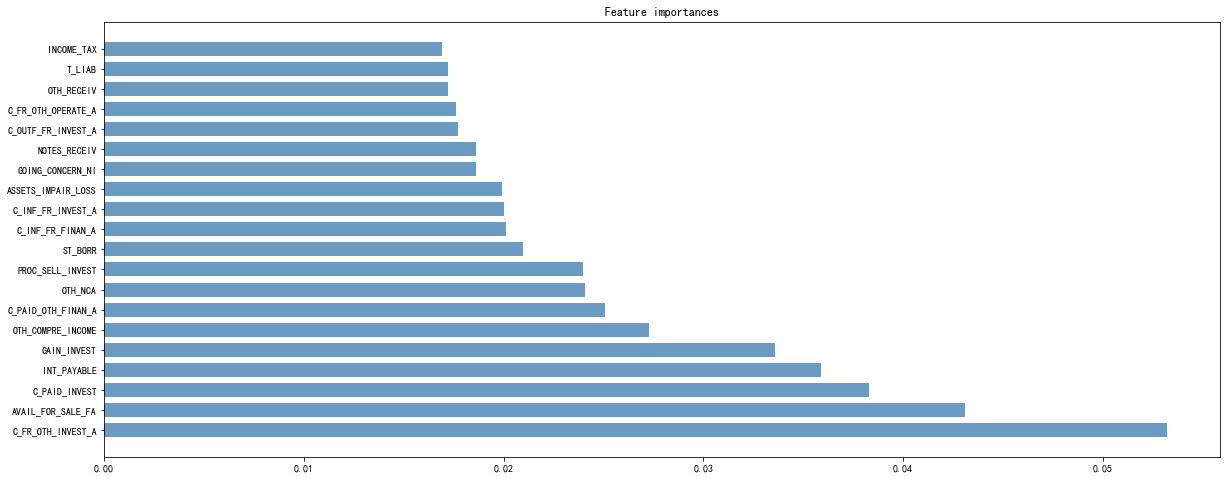

In [320]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(clf.feature_importances_)[::-1]  # 先将值按大小排序再提取索引

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("Feature importances")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

plt.barh(range(20), clf.feature_importances_[indices][:20], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(20), X_0.columns.values[12:][indices][:20])
# plt.xlim([0, max(clf.feature_importances_[indices])])

plt.show()

In [321]:
f = open('指标3.csv',mode='w')
for i in X_0.columns.values[12:][indices][:20]:
    f.write(i)
    f.write('\n')
f.close()

# 集成

In [319]:
import os
os.getcwd()

'D:\\python\\2021泰迪杯A题\\A_final'

In [ ]:
import pandas as pd

data_rate = pd.read_csv('制造业清洗完成的数据.csv')

data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier

for i in range(100):
    X_0 = data_X[data_X['FLAG']==0].sample(len(data_X[data_X['FLAG']==1])*3)
    X_1 = data_X[data_X['FLAG']==1]
    X_0 = X_0.append(X_1)
    
    X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

    sos = SMOTE(random_state=0)  # SMOTE采样
    X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)

    clf = AdaBoostClassifier(n_estimators=1000, random_state=2,learning_rate=0.25)
    clf.fit(X_sos, y_sos)

    pre = clf.predict(X_te)
    DataF[str(i)] = pre
    acc_te = sum(pre == Y_te)/len(pre)
    print('测试集的准确率',acc_te)
    
    indices = np.argsort(clf.feature_importances_)[::-1]
    f = open('制造业指标.csv',mode='w')
    for i in X_0.columns.values[12:][indices][:20]:
        f.write(i)
        f.write(',')
    f.write('\n')
    f.close()

# 指标提取

In [7]:
import pandas as pd
data = pd.read_excel('指标综合.xlsx')
data

行业类别    训练300次得到的重要特征因子 训练200次得到的重要特征因子     训练100次得到的重要特征因子
0    交通运输、仓储和邮政业             T_LIAB           T_NCL       CAPITAL_RESER
1    交通运输、仓储和邮政业      CAPITAL_RESER          T_LIAB                T_CL
2    交通运输、仓储和邮政业              T_NCL              AR       DEFER_REVENUE
3    交通运输、仓储和邮政业    PAID_IN_CAPITAL      LT_PAYABLE               T_NCL
4    交通运输、仓储和邮政业      SURPLUS_RESER   DEFER_REVENUE     PAID_IN_CAPITAL
..           ...                ...             ...                 ...
445          金融业    NOPERATE_INCOME             NaN      DEFER_TAX_LIAB
446          金融业     DEFER_TAX_LIAB             NaN  COMPR_INC_ATTR_M_S
447          金融业        GAIN_INVEST             NaN    N_CHANGE_IN_CASH
448          金融业       INTAN_ASSETS             NaN           BASIC_EPS
449          金融业  C_INF_FR_INVEST_A             NaN   C_INF_FR_INVEST_A

[450 rows x 4 columns]

In [15]:
lists = []
for i in data['行业类别'].value_counts().index:
    lists.append(i)
print(lists)

['房地产业', '交通运输、仓储和邮政业', '教育', '电力、热力、燃气及水生产和供应业', '制造业', '金融业', '建筑业', '综合', '采矿业', '科学研究和技术服务业', '农、林、牧、渔业', '批发和零售业', '水利、环境和公共设施管理业', '信息传输、软件和信息技术服务业', '文化、体育和娱乐业']


In [26]:
dic = {}
for col in range(1,4):
    for i in data[data['行业类别']=='制造业'].iloc[:,col]:
        dic[i] = dic.get(i,0)+1
dic

{'ASSETS_IMPAIR_LOSS': 3,
 'C_PAID_OTH_FINAN_A': 3,
 'C_INF_FR_INVEST_A': 3,
 'DILUTED_EPS': 3,
 'REFUND_OF_TAX': 3,
 'C_PAID_INVEST': 3,
 'GAIN_INVEST': 3,
 'OTH_PAYABLE': 3,
 'OTH_CA': 3,
 'C_PAID_FOR_TAXES': 3,
 'GOING_CONCERN_NI': 3,
 'C_FR_OTH_OPERATE_A': 3,
 'NOPERATE_INCOME': 3,
 'INVEST_INCOME': 3,
 'C_FR_OTH_INVEST_A': 3,
 'DISP_FIX_ASSETS_OTH': 3,
 'TAXES_PAYABLE': 3,
 'BASIC_EPS': 3,
 'N_CF_OPERATE_A': 3,
 'NOTES_RECEIV': 3,
 'PAID_IN_CAPITAL': 2,
 'C_PAID_TO_FOR_EMPL': 2,
 'N_CF_FR_INVEST_A': 3,
 'AVAIL_FOR_SALE_FA': 3,
 'N_CHANGE_IN_CASH': 2,
 'NOTES_PAYABLE': 2,
 'INT_PAYABLE': 2,
 'C_OUTF_FR_INVEST_A': 2,
 'OTH_NCA': 2,
 'RETAINED_EARNINGS': 2,
 'AP': 2,
 'NOPERATE_EXP': 2,
 'C_OUTF_OPERATE_A': 2,
 'INVENTORIES': 1,
 'FOREX_EFFECTS': 1}